In [3]:
import pandas as pd
from src.data.weather_loader import fetch_weather_open_meteo

LAT = 54.3233   # <- ggf. anpassen
LON = 10.1228

FORECAST_HOURS = 30
EXPECTED_STEPS = FORECAST_HOURS * 4

# "jetzt" in UTC, auf 15min gerastert
now_utc_aware = pd.Timestamp.now(tz="UTC").floor("15min")

# Für den Vergleich machen wir eine naive Version (UTC-naiv)
now_utc_naive = now_utc_aware.tz_convert("UTC").tz_localize(None)

# Hist-Zeitfenster (egal für Forecast, aber Funktion braucht es)
start_time = (now_utc_aware - pd.Timedelta(days=2)).to_pydatetime()
end_time   = now_utc_aware.to_pydatetime()

df_hist, df_fc = fetch_weather_open_meteo(
    latitude=LAT,
    longitude=LON,
    start_time=start_time,
    end_time=end_time,
    timezone="UTC",
    model="icon_seamless",
    forecast_hours=FORECAST_HOURS,
    output_timezone=None,
)

# ---------------- Validierungen ----------------

# 1) Länge
assert len(df_fc) == EXPECTED_STEPS, f"Forecast-Länge falsch: {len(df_fc)} statt {EXPECTED_STEPS}"

# 2) 15-Minuten-Raster
steps = df_fc.index.to_series().diff().dropna().unique()
assert len(steps) == 1 and steps[0] == pd.Timedelta("15min"), f"Unerwartete Zeitauflösung: {steps}"

# 3) Startzeit plausibel (Vergleich tz-naiv gegen tz-naiv)
fc_start = df_fc.index.min()  # tz-naiv
assert fc_start >= now_utc_naive, f"Forecast startet in der Vergangenheit: {fc_start} < {now_utc_naive}"

# 4) NaNs (Info)
print("NaNs pro Spalte:")
print(df_fc.isna().sum())

print(
    "✅ Forecast OK\n"
    f"   now (UTC naive): {now_utc_naive}\n"
    f"   Start: {df_fc.index.min()}\n"
    f"   Ende : {df_fc.index.max()}\n"
    f"   Punkte: {len(df_fc)}"
)

df_fc.head()


NaNs pro Spalte:
temperature_C          0
wind_speed_mps         0
solar_radiation_Wm2    0
dtype: int64
✅ Forecast OK
   now (UTC naive): 2025-12-16 18:45:00
   Start: 2025-12-16 18:45:00
   Ende : 2025-12-18 00:30:00
   Punkte: 120


,temperature_C,wind_speed_mps,solar_radiation_Wm2
time,,,
2025-12-16 18:45:00,6.6,7.0,0.0
2025-12-16 19:00:00,6.7,7.0,0.0
2025-12-16 19:15:00,6.7,6.9,0.0
2025-12-16 19:30:00,6.7,7.2,0.0
2025-12-16 19:45:00,6.8,7.6,0.0


2025-12-17 15:42:00 [INFO] src.utils.logging_config - Logging initialisiert. Logfile: logs/service.log


Notebook CWD: /Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis
RAW_TS_DIR: /Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/src/data/raw/timeseries
CLEAN_TS_DIR: /Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/src/data/clean/timeseries_no_bess


2025-12-17 15:42:01 [INFO] __main__ - Geladen: 16 Nodes (measurements)
2025-12-17 15:42:01 [INFO] __main__ - Geladen: 16 Nodes (weather_hist)
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Bereinige P_MW für Node BOLN_E01 ...
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Bereinige P_MW für Node BOLN_E02 ...
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Bereinige P_MW für Node BOLN_E03 ...
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Bereinige P_MW für Node BOLS_E41 ...
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Bereinige P_MW für Node BOLS_E42 ...
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Bereinige P_MW für Node JUBO_E01 ...
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Bereinige P_MW für Node JUBO_E02 ...
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Bereinige P_MW für Node JUBO_E03 ...
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Bereinige P_MW für Node SHUW_E23 ...
2025-12-17 15:42:01 [INFO] src.data.data_cleaning - Berei


Coverage report exists: True -> /Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/logs/data_coverage_report.csv

Top 10 niedrigste Coverage:


,node_id,freq,n_total,n_valid,n_nan,coverage_pct,first_valid,last_valid,max_nan_block_steps,max_nan_block_hours,weather_any_present_coverage_pct,weather_any_missing_steps
0,WEDING_E12,15min,68781,16096,52685,23.402,2025-07-02 14:30:00,2025-12-17 11:00:00,52666,13166.50,0.0,NaN
1,WEDING_E14,15min,68781,16096,52685,23.402,2025-07-02 14:30:00,2025-12-17 11:00:00,52666,13166.50,0.0,NaN
2,BOLS_E41,15min,68781,16110,52671,23.422,2025-07-02 14:30:00,2025-12-17 11:00:00,52666,13166.50,0.0,NaN
3,BOLS_E42,15min,68781,16110,52671,23.422,2025-07-02 14:30:00,2025-12-17 11:00:00,52666,13166.50,0.0,NaN
4,SIEV_E01,15min,68781,64775,4006,94.176,2024-01-01 00:00:00,2025-12-17 11:00:00,1904,476.00,0.0,NaN
5,SHUW_E23,15min,68781,65039,3742,94.560,2024-01-01 00:00:00,2025-12-17 11:00:00,1271,317.75,0.0,NaN
6,SIES_E02,15min,68781,66605,2176,96.836,2024-01-01 00:00:00,2025-12-17 11:00:00,1799,449.75,0.0,NaN
7,SHUW_E24,15min,68781,66692,2089,96.963,2024-01-01 00:00:00,2025-12-17 11:00:00,1583,395.75,0.0,NaN
8,BOLN_E03,15min,68781,66700,2081,96.974,2024-01-01 00:00:00,2025-12-17 11:00:00,1703,425.75,0.0,NaN
9,BOLN_E01,15min,68781,66707,2074,96.985,2024-01-01 00:00:00,2025-12-17 11:00:00,1703,425.75,0.0,NaN



Top 10 größte NaN-Blöcke:


,node_id,freq,n_total,n_valid,n_nan,coverage_pct,first_valid,last_valid,max_nan_block_steps,max_nan_block_hours,weather_any_present_coverage_pct,weather_any_missing_steps
0,WEDING_E12,15min,68781,16096,52685,23.402,2025-07-02 14:30:00,2025-12-17 11:00:00,52666,13166.50,0.0,NaN
1,WEDING_E14,15min,68781,16096,52685,23.402,2025-07-02 14:30:00,2025-12-17 11:00:00,52666,13166.50,0.0,NaN
2,BOLS_E41,15min,68781,16110,52671,23.422,2025-07-02 14:30:00,2025-12-17 11:00:00,52666,13166.50,0.0,NaN
3,BOLS_E42,15min,68781,16110,52671,23.422,2025-07-02 14:30:00,2025-12-17 11:00:00,52666,13166.50,0.0,NaN
4,SIEV_E01,15min,68781,64775,4006,94.176,2024-01-01 00:00:00,2025-12-17 11:00:00,1904,476.00,0.0,NaN
6,SIES_E02,15min,68781,66605,2176,96.836,2024-01-01 00:00:00,2025-12-17 11:00:00,1799,449.75,0.0,NaN
8,BOLN_E03,15min,68781,66700,2081,96.974,2024-01-01 00:00:00,2025-12-17 11:00:00,1703,425.75,0.0,NaN
9,BOLN_E01,15min,68781,66707,2074,96.985,2024-01-01 00:00:00,2025-12-17 11:00:00,1703,425.75,0.0,NaN
7,SHUW_E24,15min,68781,66692,2089,96.963,2024-01-01 00:00:00,2025-12-17 11:00:00,1583,395.75,0.0,NaN
5,SHUW_E23,15min,68781,65039,3742,94.560,2024-01-01 00:00:00,2025-12-17 11:00:00,1271,317.75,0.0,NaN



--- Summary cleaned measurements (worst coverage first) ---


,node_id,start,end,n,nan,coverage_pct,first_valid,last_valid
14,WEDING_E12,2024-01-01,2025-12-17 11:00:00,68781,52685,23.402,2025-07-02 14:30:00,2025-12-17 11:00:00
15,WEDING_E14,2024-01-01,2025-12-17 11:00:00,68781,52685,23.402,2025-07-02 14:30:00,2025-12-17 11:00:00
3,BOLS_E41,2024-01-01,2025-12-17 11:00:00,68781,52671,23.422,2025-07-02 14:30:00,2025-12-17 11:00:00
4,BOLS_E42,2024-01-01,2025-12-17 11:00:00,68781,52671,23.422,2025-07-02 14:30:00,2025-12-17 11:00:00
11,SIEV_E01,2024-01-01,2025-12-17 11:00:00,68781,4006,94.176,2024-01-01 00:00:00,2025-12-17 11:00:00
8,SHUW_E23,2024-01-01,2025-12-17 11:00:00,68781,3742,94.560,2024-01-01 00:00:00,2025-12-17 11:00:00
10,SIES_E02,2024-01-01,2025-12-17 11:00:00,68781,2176,96.836,2024-01-01 00:00:00,2025-12-17 11:00:00
9,SHUW_E24,2024-01-01,2025-12-17 11:00:00,68781,2089,96.963,2024-01-01 00:00:00,2025-12-17 11:00:00
2,BOLN_E03,2024-01-01,2025-12-17 11:00:00,68781,2081,96.974,2024-01-01 00:00:00,2025-12-17 11:00:00
0,BOLN_E01,2024-01-01,2025-12-17 11:00:00,68781,2074,96.985,2024-01-01 00:00:00,2025-12-17 11:00:00


2025-12-17 15:42:01 [INFO] src.network.bess_cleaning - BESS-clean Output-Verzeichnis: /Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/src/data/clean/timeseries_no_bess
2025-12-17 15:42:01 [INFO] src.network.bess_cleaning - BESS-Matrix geladen: 2 Serien, shape=(68781, 2), ridge_alpha=1.000000
2025-12-17 15:42:01 [INFO] src.network.bess_cleaning - BESS-clean(Ridge) JUBO_E03: n_fit=16045 r2=0.052 corr(y,removed)=0.103 |beta|_sum=0.079
2025-12-17 15:42:01 [INFO] src.network.bess_cleaning - BESS-clean(Ridge) JUBO_E02: n_fit=16043 r2=0.005 corr(y,removed)=0.030 |beta|_sum=0.048
2025-12-17 15:42:02 [INFO] src.network.bess_cleaning - BESS-clean(Ridge) BOLN_E01: n_fit=16024 r2=0.000 corr(y,removed)=0.007 |beta|_sum=0.005
2025-12-17 15:42:02 [INFO] src.network.bess_cleaning - BESS-clean(Ridge) TARP_E01: n_fit=16046 r2=0.197 corr(y,removed)=0.228 |beta|_sum=0.371
2025-12-17 15:42:02 [INFO] src.network.bess_cleaning - BESS-clean(Ridge) SHUW_E23: n_fit=16050 r2=0.226 co

,node_id,n_fit,r2,corr_y_removed,beta_abs_sum,ridge_alpha,beta__BOLS_E41_hist.csv,beta__BOLS_E42_hist.csv
7,WEDING_E12,16000,0.203167,0.450072,0.291249,1.0,-0.263688,-0.027561
5,WEDING_E14,15999,0.102737,0.319963,0.228407,1.0,-0.012593,-0.215814
4,SHUW_E23,16050,0.225872,0.263663,0.750621,1.0,-0.646912,0.103709
3,TARP_E01,16046,0.197005,0.228141,0.370721,1.0,-0.051755,-0.318966
6,SHUW_E24,16049,0.101503,0.154763,0.676972,1.0,0.093452,-0.583520
8,TARP_E03,16039,0.100806,0.129371,0.220621,1.0,0.015317,0.205303
13,SIEV_E01,16028,0.063734,0.128111,0.177400,1.0,0.065251,0.112150
0,JUBO_E03,16045,0.052098,0.103204,0.078724,1.0,0.027263,0.051461
12,JUBO_E01,16057,0.020287,0.062841,0.126374,1.0,-0.038927,-0.087447
1,JUBO_E02,16043,0.004747,0.029969,0.047838,1.0,0.011445,0.036393


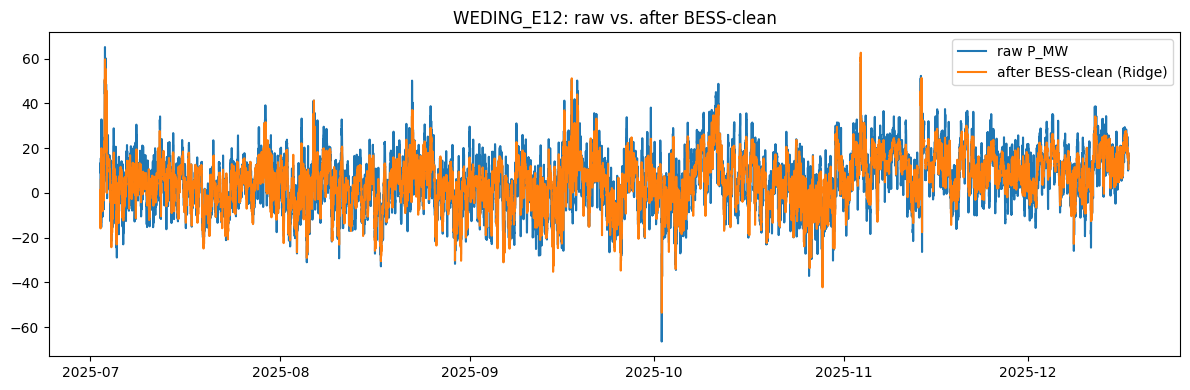

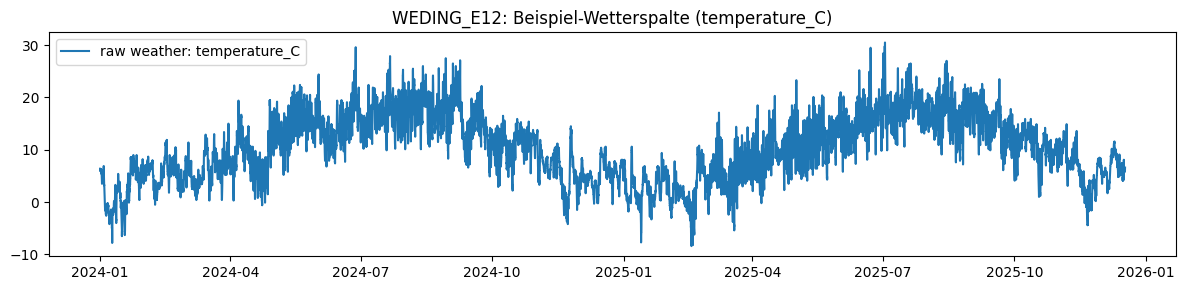

In [2]:
import os
import logging
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.utils.logging_config import setup_logging
from src.config import RAW_TS_DIR, CLEAN_TS_DIR, FREQ
from src.data.data_cleaning import clean_data  # <-- WICHTIG: nicht nur helper importieren
from src.network.bess_cleaning import remove_bess_effects_from_csv_multi

# ---------------- Logging (wie main.py) ----------------
setup_logging(level=logging.INFO)
logger = logging.getLogger(__name__)

print("Notebook CWD:", os.getcwd())
print("RAW_TS_DIR:", RAW_TS_DIR)
print("CLEAN_TS_DIR:", CLEAN_TS_DIR)

# ---------------- 1) Rohdaten aus CSV laden (kein Scraping) ----------------
meas_dir = Path(RAW_TS_DIR)
csv_files = sorted(meas_dir.glob("*_hist.csv"))
assert len(csv_files) > 0, f"Keine *_hist.csv in {meas_dir} gefunden."

MAX_NODES = 20  # für Tests
data_measurements = {}
data_weather_hist = {}

for p in csv_files[:MAX_NODES]:
    node_id = p.stem.replace("_hist", "")
    df = pd.read_csv(p, parse_dates=["timestamp"]).sort_values("timestamp").set_index("timestamp")

    if "P_MW" not in df.columns:
        logger.warning("Skip %s: keine Spalte P_MW", p.name)
        continue

    # main.py-analog: measurements als Series
    data_measurements[node_id] = df["P_MW"].astype(float)

    # weather_hist als DataFrame (falls vorhanden)
    weather_cols = [c for c in df.columns if c != "P_MW"]
    if weather_cols:
        data_weather_hist[node_id] = df[weather_cols].copy()
    else:
        data_weather_hist[node_id] = pd.DataFrame(index=df.index)

logger.info("Geladen: %d Nodes (measurements)", len(data_measurements))
logger.info("Geladen: %d Nodes (weather_hist)", len(data_weather_hist))

# forecast lassen wir hier leer (weil „kein Scraping“)
data = {
    "nodes": [],  # optional, clean_data nutzt es nur zum Durchreichen
    "measurements": data_measurements,
    "weather_hist": data_weather_hist,
    "weather_forecast": {},
}

# ---------------- 2) Data Cleaning (GENAU über clean_data) ----------------
data_clean = clean_data(data)  # schreibt logs/data_coverage_report.csv (wenn du die angepasste Datei nutzt)

# Coverage-Report prüfen
report_path = Path("logs") / "data_coverage_report.csv"
print("\nCoverage report exists:", report_path.exists(), "->", report_path.resolve())

if report_path.exists():
    cov = pd.read_csv(report_path)
    print("\nTop 10 niedrigste Coverage:")
    display(cov.sort_values("coverage_pct", ascending=True).head(10))

    print("\nTop 10 größte NaN-Blöcke:")
    display(cov.sort_values("max_nan_block_steps", ascending=False).head(10))

# Kurzsummary nach Cleaning
def summarize_series(s: pd.Series) -> dict:
    return {
        "start": s.index.min(),
        "end": s.index.max(),
        "n": len(s),
        "nan": int(s.isna().sum()),
        "coverage_pct": round(100.0 * (1.0 - s.isna().mean()), 3),
        "first_valid": s.first_valid_index(),
        "last_valid": s.last_valid_index(),
    }

summary_df = pd.DataFrame(
    [{"node_id": k, **summarize_series(v)} for k, v in data_clean["measurements"].items()]
).sort_values("coverage_pct", ascending=True)

print("\n--- Summary cleaned measurements (worst coverage first) ---")
display(summary_df.head(10))

# ---------------- 3) BESS Cleaning (Ridge) wie in der Pipeline ----------------
BESS_FILES = ["BOLS_E41_hist.csv", "BOLS_E42_hist.csv"]  # <- ggf. anpassen

clean_bess_dict, bess_report = remove_bess_effects_from_csv_multi(
    bess_files=BESS_FILES,
    ts_col="timestamp",
    val_col="P_MW",
    min_overlap_points=200,
    out_dir=None,    # => CLEAN_TS_DIR
    ridge_alpha=1.0,
)

logger.info("BESS-clean fertig. Output in: %s", CLEAN_TS_DIR)
display(bess_report.head(10))

# ---------------- 4) Plot: raw vs. cleaned (no_bess) für Beispielnode ----------------
if not bess_report.empty:
    example_node = bess_report.iloc[0]["node_id"]

    # raw (aus CSV, inkl. Wetter)
    p = meas_dir / f"{example_node}_hist.csv"
    df_raw = pd.read_csv(p, parse_dates=["timestamp"]).sort_values("timestamp").set_index("timestamp")

    y_raw = df_raw["P_MW"].astype(float)
    y_clean_bess = clean_bess_dict[example_node]

    plt.figure(figsize=(12,4))
    plt.plot(y_raw.index, y_raw, label="raw P_MW")
    plt.plot(y_clean_bess.index, y_clean_bess, label="after BESS-clean (Ridge)")
    plt.title(f"{example_node}: raw vs. after BESS-clean")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # optional: Wetter mit anzeigen (falls vorhanden)
    weather_cols = [c for c in df_raw.columns if c != "P_MW"]
    if weather_cols:
        col = weather_cols[0]
        plt.figure(figsize=(12,3))
        plt.plot(df_raw.index, df_raw[col], label=f"raw weather: {col}")
        plt.title(f"{example_node}: Beispiel-Wetterspalte ({col})")
        plt.legend()
        plt.tight_layout()
        plt.show()
else:
    print("BESS-Report ist leer – evtl. falsche BESS_FILES oder min_overlap_points zu hoch.")


In [1]:
from src.data.eiot_client import _load_eiot_token
import logging

logging.getLogger("src.data.eiot_client").setLevel(logging.INFO)

try:
    token = _load_eiot_token()
    print("Token erfolgreich geladen. Länge:", len(token))
    print("Token (Anfang):", token[:50], "...")
except Exception as e:
    print("Fehler beim Laden des Tokens:", repr(e))


Token erfolgreich geladen. Länge: 1250
Token (Anfang): eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6InJ0c0 ...


In [2]:
from datetime import datetime, timezone, timedelta
from src.data.eiot_client import fetch_datapoint_raw

dp_id = "7b3fec1d-2c6f-4450-b41a-74d709e1c3b6"  # eine gültige ID einsetzen
start = datetime.now(timezone.utc) - timedelta(hours=1)
end = datetime.now(timezone.utc)

try:
    resp = fetch_datapoint_raw(
        datapoint_id=dp_id,
        start_time=start,
        end_time=end,
        aggregation="AVG",
        bucket_factor=15,
        bucket_unit="MINUTE",
        timezone_str="Europe/Berlin",
        chunk_days=1,
    )
    print("OK, Samples:", len(resp.get("samples", [])))
except Exception as e:
    print("Fehler beim EIOT-Request:", repr(e))


OK, Samples: 4


In [5]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

from datetime import datetime, timezone
import logging
import pandas as pd

from src.data.data_loader import load_all_data

# Logging hochdrehen (optional)
logging.getLogger("src.data").setLevel(logging.INFO)
logging.getLogger("src.data.data_loader").setLevel(logging.INFO)
logging.getLogger("src.data.eiot_client").setLevel(logging.INFO)
logging.getLogger("src.data.weather_loader").setLevel(logging.INFO)

# --- Zeitraum für Wetter definieren: 01.01.2024 bis jetzt ---

tz = "Europe/Berlin"
now = pd.Timestamp.now(tz=tz)              # entspricht dem 'now' in fetch_weather_open_meteo
start_weather = pd.Timestamp("2024-01-01 00:00", tz=tz)

past_hours = int((now - start_weather).total_seconds() // 3600) + 1

print(f"Wetter-Historie: von {start_weather} bis {now}")
print(f"-> weather_past_hours = {past_hours}")

print("Starte Datenladen ...")

data = load_all_data(
    weather_forecast_hours=24,   # oder 0, wenn du keinen Forecast brauchst
)


print("FERTIG.\n")

print("Geladene Nodes:")
print(data["nodes"].index.tolist())

print("\nNodes mit Messwerten:")
print(list(data["measurements"].keys()))

if data["measurements"]:
    first = next(iter(data["measurements"].keys()))
    print("\nBeispiel für ersten Node:", first)
    print(data["measurements"][first].head())
    print(data["measurements"][first].tail())


Wetter-Historie: von 2024-01-01 00:00:00+01:00 bis 2025-12-10 12:45:03.237956+01:00
-> weather_past_hours = 17029
Starte Datenladen ...


/Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/src/data/data_loader.py:454: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  s = pd.concat([s_old, s_new])
/Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/src/data/data_loader.py:454: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  s = pd.concat([s_old, s_new])
/Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/src/data/data_loader.py:454: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a 

FERTIG.

Geladene Nodes:
['SHUW_E24', 'SHUW_E23', 'JUBO_E01', 'JUBO_E02', 'JUBO_E03', 'TARP_E03', 'TARP_E01', 'WEDING_E14', 'WEDING_E12', 'SIEV_E01', 'SIES_E02', 'BOLN_E02', 'BOLN_E03', 'BOLN_E01', 'BOLS_E42', 'BOLS_E41']

Nodes mit Messwerten:
['SHUW_E24', 'SHUW_E23', 'JUBO_E02', 'JUBO_E03', 'TARP_E03', 'TARP_E01', 'WEDING_E14', 'WEDING_E12', 'SIEV_E01', 'SIES_E02', 'BOLN_E03', 'BOLN_E01', 'BOLS_E42', 'BOLS_E41', 'JUBO_E01', 'BOLN_E02']

Beispiel für ersten Node: SHUW_E24
2024-01-01 00:00:00   -22.996800
2024-01-01 00:15:00   -23.516007
2024-01-01 00:30:00   -23.192500
2024-01-01 00:45:00   -22.885967
2024-01-01 01:00:00   -24.715713
Name: P_MW, dtype: float64
2025-12-10 11:30:00   NaN
2025-12-10 11:45:00   NaN
2025-12-10 12:00:00   NaN
2025-12-10 12:15:00   NaN
2025-12-10 12:30:00   NaN
Name: P_MW, dtype: float64


### Test data cleaning

In [1]:
from src.data.data_loader import load_all_data
from src.data.data_cleaning import clean_data

# 1) Rohdaten laden
raw = load_all_data()

print(
    "Nodes:", len(raw["nodes"]),
    "| Messreihen:", len(raw["measurements"]),
    "| Wetter-Hist:", len(raw["weather_hist"]),
)

# 2) Bereinigung
clean = clean_data(raw)

print(
    "Clean-Messreihen:", len(clean["measurements"]),
    "| Clean-Wetter-Hist:", len(clean["weather_hist"]),
)


/Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'historical-forecast-api.open-meteo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.open-meteo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made t

Nodes: 16 | Messreihen: 16 | Wetter-Hist: 16
Clean-Messreihen: 16 | Clean-Wetter-Hist: 16


In [3]:
# Einen beliebigen Node nehmen, der Messwerte hat
node_id = next(iter(raw["measurements"].keys()))
print("Teste Node:", node_id)

s_raw = raw["measurements"][node_id]
s_clean = clean["measurements"][node_id]

print("\nRAW P_MW head:")
print(s_raw.head())

print("\nCLEAN P_MW head:")
print(s_clean.head())

print("\nRAW Zeitspanne:", s_raw.index.min(), "→", s_raw.index.max())
print("CLEAN Zeitspanne:", s_clean.index.min(), "→", s_clean.index.max())

print("\nNaNs P_MW (raw → clean):",
      s_raw.isna().sum(), "→", s_clean.isna().sum())


Teste Node: SHUW_E24

RAW P_MW head:
timestamp
2024-01-01 00:00:00   -22.996800
2024-01-01 00:15:00   -23.516007
2024-01-01 00:30:00   -23.192500
2024-01-01 00:45:00   -22.885967
2024-01-01 01:00:00   -24.715713
Name: P_MW, dtype: float64

CLEAN P_MW head:
2024-01-01 00:00:00   -22.996800
2024-01-01 00:15:00   -23.516007
2024-01-01 00:30:00   -23.192500
2024-01-01 00:45:00   -22.885967
2024-01-01 01:00:00   -24.715713
Freq: 15min, Name: P_MW, dtype: float64

RAW Zeitspanne: 2024-01-01 00:00:00 → 2025-12-07 17:15:00
CLEAN Zeitspanne: 2024-01-01 00:00:00 → 2025-12-07 17:15:00

NaNs P_MW (raw → clean): 2364 → 2089


In [4]:
weather_cols = ["temperature_C", "wind_speed_mps", "solar_radiation_Wm2"]

if node_id in raw["weather_hist"]:
    w_raw = raw["weather_hist"][node_id]
    w_clean = clean["weather_hist"][node_id]

    print("\nRAW Wetter head:")
    print(w_raw[weather_cols].head())

    print("\nCLEAN Wetter head:")
    print(w_clean[weather_cols].head())

    print("\nNaNs Wetter (raw → clean):")
    for col in weather_cols:
        if col in w_raw.columns:
            print(
                col,
                ":", w_raw[col].isna().sum(),
                "→", w_clean[col].isna().sum()
            )
else:
    print("Keine Wetterdaten für Node", node_id)



RAW Wetter head:
                     temperature_C  wind_speed_mps  solar_radiation_Wm2
time                                                                   
2024-01-01 01:00:00            6.6            17.7                  0.0
2024-01-01 01:15:00            6.6            17.4                  0.0
2024-01-01 01:30:00            6.5            17.1                  0.0
2024-01-01 01:45:00            6.4            16.9                  0.0
2024-01-01 02:00:00            6.3            16.5                  0.0

CLEAN Wetter head:
                     temperature_C  wind_speed_mps  solar_radiation_Wm2
2024-01-01 01:00:00            6.6            17.7                  0.0
2024-01-01 01:15:00            6.6            17.4                  0.0
2024-01-01 01:30:00            6.5            17.1                  0.0
2024-01-01 01:45:00            6.4            16.9                  0.0
2024-01-01 02:00:00            6.3            16.5                  0.0

NaNs Wetter (raw → clean)

In [1]:
from src.main import main
print("go")
res = main(run_full_pipeline=False)

raw = res["raw"]
clean = res["clean"]

node_id = next(iter(raw["measurements"].keys()))
print("Node:", node_id)
print(clean["measurements"][node_id].head())


2025-12-07 21:00:19 [INFO] src.utils.logging_config - Logging initialisiert. Logfile: logs\service.log
2025-12-07 21:00:19 [INFO] src.main - Starte Leistungsband-Service...


go


2025-12-07 21:00:24 [INFO] src.data.data_loader - Starte Laden der historischen Wirkleistungs- und Wetterdaten (global_start_local=2024-01-01 01:00:00+01:00, end_local=2025-12-07 21:00:24.540540+01:00, global_start_utc=2024-01-01 00:00:00+00:00, end_time_utc=2025-12-07 20:00:24.540540+00:00) ...
2025-12-07 21:00:24 [INFO] src.data.data_loader - Lade Knotendaten (inkl. P_Datapoint_ID, Lat/Lon, DerivedSpec) aus C:\Users\M97947\OneDrive - E.ON\Dokumente\Thesis\Code_Github\masterthesis\src\data\raw\graph\whole_graph.json ...
2025-12-07 21:00:24 [INFO] src.data.data_loader - Knotendaten geladen: 16 Knoten.
2025-12-07 21:00:24 [INFO] src.data.data_loader - Verarbeite Node SHUW_E24 (DP=97f72ae3-8fe4-4ef6-a3f6-5f58b2ec2380) ...
2025-12-07 21:00:24 [INFO] src.data.data_loader - Gefundene bestehende Hist-Daten für SHUW_E24: von 2024-01-01 00:00:00 bis 2025-12-07 17:45:00 (Zeilen: 67848)
2025-12-07 21:00:24 [INFO] src.data.data_loader - Node SHUW_E24: vorhandene Daten bis 2025-12-07 17:45:00 (loc

Node: SHUW_E24
2024-01-01 00:00:00   -22.996800
2024-01-01 00:15:00   -23.516007
2024-01-01 00:30:00   -23.192500
2024-01-01 00:45:00   -22.885967
2024-01-01 01:00:00   -24.715713
Freq: 15min, Name: P_MW, dtype: float64


## Graph Stuff

In [7]:
# ================================================
# Test des Netzmodells & Konsistenzchecks
# ================================================

from src.network.network_model import load_network_model
from src.utils.logging_config import setup_logging

import numpy as np
import pandas as pd

setup_logging()

# ------------------------------------------------
# Netzmodell laden
# ------------------------------------------------
net = load_network_model()  # optional: load_network_model(slack_node="SHUW_E24")

print("---- Netzmodell Überblick ----")
print("Anzahl Knoten:", len(net.nodes))
print("Anzahl Leitungen:", len(net.lines))
print("Shape A (lines x nodes):", net.A.shape)
print("Shape Bbus (nodes x nodes):", net.Bbus.shape)
print("Slack-Knoten:", net.slack_node)
print("Shape Ar:", net.Ar.shape)
print("Shape B_rr:", net.B_rr.shape)

print("\n---- Beispiel: Nodes ----")
display(net.nodes.head())

print("\n---- Beispiel: Leitungen ----")
# Wir haben Limits nur in Ampere, keine MW-Limits und keine Längen mehr im Modell notwendig
cols_to_show = [c for c in ["from_node", "to_node", "x", "b", "limit_a"] if c in net.lines.columns]
display(net.lines[cols_to_show].head())


# ================================================
# Konsistenzcheck 1: Bbus Symmetrie
# ================================================
B = net.Bbus.values
print("\nSymmetriecheck Bbus:")
sym_diff = np.abs(B - B.T).max()
print("max |B - B^T| =", sym_diff)

# ================================================
# Konsistenzcheck 2: Spaltensummen von Bbus
# ================================================
col_sums = B.sum(axis=0)
print("max |Spaltensumme(Bbus)| =", np.abs(col_sums).max())

# ================================================
# Konsistenzcheck 3: Rang von B_rr
# ================================================
rank_B_rr = np.linalg.matrix_rank(net.B_rr.values)
print("Rang von B_rr:", rank_B_rr, "von", net.B_rr.shape[0])


# ================================================
# Konsistenzcheck 4: Reaktanzen – aber Busbar-Leitungen ausnehmen
# ================================================
print("\n---- Reaktanz-Check (nur Nicht-Busbar-Leitungen) ----")

# Debug: Welche Typen gibt es überhaupt?
if "type" in net.nodes.columns:
    print("Verfügbare Node-Typen und Häufigkeit:")
    print(net.nodes["type"].value_counts())
else:
    print("Warnung: net.nodes hat keine Spalte 'type'. Busbars können dann nicht erkannt werden.")
    
# Busbar-Knoten bestimmen (falls 'type' vorhanden)
if "type" in net.nodes.columns:
    # Annahme: Index von net.nodes ist die Node-ID (z.B. 'SHUW', 'SHUW_E24', ...)
    busbar_nodes = set(net.nodes.index[net.nodes["type"] == "busbar"])
else:
    busbar_nodes = set()

print("\nAnzahl erkannter Sammelschienen (busbar_nodes):", len(busbar_nodes))
if len(busbar_nodes) > 0:
    print("Beispiel Busbar-Nodes:", list(sorted(busbar_nodes))[:10])

# Falls 'x' nicht existiert, abbrechen
if "x" not in net.lines.columns:
    print("Spalte 'x' in net.lines nicht gefunden – kein Reaktanz-Check möglich.")
else:
    # 1) Leitungen mit fehlender oder 0-Reaktanz
    is_missing_x = net.lines["x"].isna() | (net.lines["x"] == 0)

    # 2) Leitungen, die an eine Sammelschiene angeschlossen sind:
    #    -> from_node ODER to_node ist in busbar_nodes
    if busbar_nodes:
        connected_to_busbar = (
            net.lines["from_node"].isin(busbar_nodes)
            | net.lines["to_node"].isin(busbar_nodes)
        )
    else:
        # Keine Busbars bekannt -> alle False
        connected_to_busbar = pd.Series(False, index=net.lines.index)

    # 3) Wirkliche Problem-Leitungen:
    #    fehlende/0 Reaktanz UND NICHT an Busbar angeschlossen
    problem_lines = net.lines[is_missing_x & ~connected_to_busbar]

    print(f"Gesamtzahl Leitungen mit fehlender/0 Reaktanz: {int(is_missing_x.sum())}")
    print(f"...davon direkt an Sammelschienen angeschlossen: {int((is_missing_x & connected_to_busbar).sum())}")
    print(f"...übrig (relevant zu prüfen): {len(problem_lines)}")

    if len(problem_lines) > 0:
        print("\nLeitungen mit fehlender/0 Reaktanz (ohne Busbar-Anschluss):")
        cols_show = [c for c in ["from_node", "to_node", "x", "limit_a"] if c in problem_lines.columns]
        display(problem_lines[cols_show].head(20))
    else:
        print("✅ Alle relevanten (Nicht-Busbar-)Leitungen haben eine gültige Reaktanz.")


print("\nNetzmodell-Test abgeschlossen.")


2025-12-08 12:32:40 [INFO] src.utils.logging_config - Logging initialisiert. Logfile: logs\service.log
2025-12-08 12:32:40 [INFO] src.network.network_model - Lade Netzgraph aus C:\Users\M97947\OneDrive - E.ON\Dokumente\Thesis\Code_Github\masterthesis\src\data\raw\graph\whole_graph.json ...
2025-12-08 12:32:40 [INFO] src.network.network_model - Graph geladen (Listenformat): 29 Nodes, 29 Edges.
2025-12-08 12:32:40 [INFO] src.network.network_model - Nodes-DataFrame aufgebaut: 29 Knoten (Index=id).
2025-12-08 12:32:40 [WARNING] src.network.network_model - Leitung SHUW_SS_E24 (SHUW -> SHUW_E24) hat keine Reaktanz (X_total_ohm/X_ohm_per_km) – wird vorerst übersprungen.
2025-12-08 12:32:40 [WARNING] src.network.network_model - Leitung TARP_SS_TARP_E01 (Tarp -> Tarp_E01) hat keine Reaktanz (X_total_ohm/X_ohm_per_km) – wird vorerst übersprungen.
2025-12-08 12:32:40 [WARNING] src.network.network_model - Leitung JUBO_E03_JUBO (JUBO -> JUBO_E03) hat keine Reaktanz (X_total_ohm/X_ohm_per_km) – wird

---- Netzmodell Überblick ----
Anzahl Knoten: 29
Anzahl Leitungen: 6
Shape A (lines x nodes): (6, 29)
Shape Bbus (nodes x nodes): (29, 29)
Slack-Knoten: BOLN_E01
Shape Ar: (6, 28)
Shape B_rr: (28, 28)

---- Beispiel: Nodes ----


,label,type,pos_x,pos_y,P_Datapoint_ID,Q_Datapoint_ID,Windgeschw_Datapoint,Globale_Strahlung_Datapoint,Aussentemp_Datapoint,Latitude_deg,Longitude_deg,Strom_Limit_in_A,DAB_ID,busbar_id,derived,p_max_MW
id,,,,,,,,,,,,,,,,
BOLN,BOLN,busbar,850.387134,0.010577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BOLN_A3,BOLN_A3,junction,619.655071,-1.172015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BOLN_E01,BOLN_E01,uw_field,990.284389,40.972400,34482f6c-cbbc-4f7f-99ae-db73a5885eb9,NaN,360b2dc9-834a-42d6-8653-2630cbdcfb38,2ed62708-3221-400f-b30e-6bf21798b4c5,6a4f03f6-17a7-40d1-96cb-483e4a7c2ad1,54.615976,9.449164,NaN,SHNG_E:DSO:SHN:ST:STUW45210:SA:110:SF:E01,NaN,NaN,NaN
BOLN_E02,BOLN_E02,uw_field,714.233866,-4.270225,NaN,NaN,360b2dc9-834a-42d6-8653-2630cbdcfb38,2ed62708-3221-400f-b30e-6bf21798b4c5,6a4f03f6-17a7-40d1-96cb-483e4a7c2ad1,54.615976,9.449164,NaN,NaN,"BOLN_E03:-1, BOLN_E02:-1","{'method': 'field_sum', 'feature_key': 'P', 't...",NaN
BOLN_E03,BOLN_E03,uw_field,984.103815,-35.689258,bf40c502-ea38-4eca-986a-11fa618c97f1,NaN,360b2dc9-834a-42d6-8653-2630cbdcfb38,2ed62708-3221-400f-b30e-6bf21798b4c5,6a4f03f6-17a7-40d1-96cb-483e4a7c2ad1,54.615976,9.449164,NaN,SHNG_E:DSO:SHN:ST:STUW45210:SA:110:SF:E03,NaN,NaN,NaN



---- Beispiel: Leitungen ----


,from_node,to_node,x,b,limit_a
id,,,,,
110_SHUW_TARP_GELB_JUBO_BOLS_A5_BOLS,BOLS_A5,BOLS_E42,0.000040,25062.656642,547.0
110_SHUW_TARP_GELB_JUBO_BOLS_A5_TARP,Tarp_E01,BOLS_A5,69.101054,0.014472,547.0
110_SHUW_TARP_GELB_JUBO_JUBO_A5_BOLS_A5,BOLS_A5,JUBO_A5,11.403285,0.087694,555.0
110_SHUW_TARP_GELB_JUBO_JUBO_A5_JUBO,JUBO_A5,JUBO_E01,4.990608,0.200376,632.0
110_SHUW_TARP_GELB_JUBO_SHUW_JUBO_A5,SHUW_E24,JUBO_A5,1.626966,0.614641,1435.0



Symmetriecheck Bbus:
max |B - B^T| = 0.0
max |Spaltensumme(Bbus)| = 1.477965319574004e-12
Rang von B_rr: 6 von 28

---- Reaktanz-Check (nur Nicht-Busbar-Leitungen) ----
Verfügbare Node-Typen und Häufigkeit:
type
uw_field    14
busbar       7
junction     6
battery      2
Name: count, dtype: int64

Anzahl erkannter Sammelschienen (busbar_nodes): 7
Beispiel Busbar-Nodes: ['BOLN', 'JUBO', 'SHUW', 'SIES', 'SIEV', 'Tarp', 'Weding']
Gesamtzahl Leitungen mit fehlender/0 Reaktanz: 0
...davon direkt an Sammelschienen angeschlossen: 0
...übrig (relevant zu prüfen): 0
✅ Alle relevanten (Nicht-Busbar-)Leitungen haben eine gültige Reaktanz.

Netzmodell-Test abgeschlossen.


In [13]:
# ============================================================
# Überblick über whole_graph.json + Kanten ohne Reaktanz
# (ohne direkte Verbindung zu einer Sammelschiene)
# ============================================================

import json
import pandas as pd
from src.config import GRAPH_PATH

try:
    from IPython.display import display
except ImportError:
    display = print

# -------------------------
# 1) JSON einlesen
# -------------------------
with open(GRAPH_PATH, "r", encoding="utf-8") as f:
    elems = json.load(f)

nodes = [e for e in elems if "data" in e and "source" not in e["data"]]
edges = [e for e in elems if "data" in e and "source" in e["data"]]

print("==== GROBER ÜBERBLICK ====")
print(f"Anzahl Knoten im JSON: {len(nodes)}")
print(f"Anzahl Kanten im JSON: {len(edges)}\n")

# -------------------------
# 2) Knotentypen auswerten
# -------------------------
node_info = []
for e in nodes:
    d = e["data"]
    node_info.append({
        "id": d["id"],
        "label": d.get("label", d["id"]),
        "type": d.get("type", None)
    })

df_nodes = pd.DataFrame(node_info)

print("Knotentypen im JSON:")
print(df_nodes["type"].value_counts())
print("\nBeispiel-Knoten:")
display(df_nodes.head(10))

# Mapping ID -> Typ
node_type_map = df_nodes.set_index("id")["type"].to_dict()

# -------------------------
# 3) Kanten grob anzeigen
# -------------------------
edge_info = []
for e in edges:
    d = e["data"]
    feats = d.get("features", {}) or {}
    edge_info.append({
        "id": d.get("id"),
        "label": d.get("label"),
        "source": d.get("source"),
        "target": d.get("target"),
        "source_type": node_type_map.get(d.get("source")),
        "target_type": node_type_map.get(d.get("target")),
        "has_X_total_ohm": feats.get("X_total_ohm") is not None,
        "has_X_ohm_per_km": feats.get("X_ohm_per_km") is not None,
        "strom_limit_a": feats.get("Strom_Limit_in_A"),
    })

df_edges = pd.DataFrame(edge_info)

print("\nBeispiel-Kanten:")
display(df_edges.head(20))

# -------------------------
# 4) Kanten ohne Reaktanz
#    UND nicht an Sammelschiene
# -------------------------

def has_reactance(row):
    return bool(row["has_X_total_ohm"] or row["has_X_ohm_per_km"])

def touches_busbar(row):
    return (row["source_type"] == "busbar") or (row["target_type"] == "busbar")

mask_no_x_and_no_bus = (~df_edges.apply(has_reactance, axis=1)) & (~df_edges.apply(touches_busbar, axis=1))

df_edges_problem = df_edges[mask_no_x_and_no_bus].copy()

print("\n==== KANTEN OHNE REAKTANZ (UND NICHT AN SAMMELSCHIENE) ====")
print(f"Anzahl solcher Kanten: {len(df_edges_problem)}")

if len(df_edges_problem) > 0:
    display(df_edges_problem[[
        "id", "label", "source", "source_type", "target", "target_type", "strom_limit_a"
    ]])
else:
    print("Keine Kanten gefunden, die die Kriterien erfüllen.")


==== GROBER ÜBERBLICK ====
Anzahl Knoten im JSON: 29
Anzahl Kanten im JSON: 29

Knotentypen im JSON:
type
uw_field    14
busbar       7
junction     6
battery      2
Name: count, dtype: int64

Beispiel-Knoten:


,id,label,type
0,WEDING,WEDING,busbar
1,TARP,TARP,busbar
2,JUBO,JUBO,busbar
3,SHUW,SHUW,busbar
4,BOLN,BOLN,busbar
5,SIES,SIES,busbar
6,SIEV,SIEV,busbar
7,SHUW_E24,SHUW_E24,uw_field
8,SHUW_E23,SHUW_E23,uw_field
9,JUBO_E01,JUBO_E01,uw_field



Beispiel-Kanten:


,id,label,source,target,source_type,target_type,has_X_total_ohm,has_X_ohm_per_km,strom_limit_a
0,SHUW_SS_E23,SHUW_SS_E23,SHUW,SHUW_E23,busbar,uw_field,False,False,NaN
1,SHUW_SS_E24,SHUW_SS_E24,SHUW,SHUW_E24,busbar,uw_field,False,False,NaN
2,JUBO_E01_JUBO,JUBO_E01_JUBO,JUBO,JUBO_E01,busbar,uw_field,False,False,NaN
3,JUBO_E02_JUBO,JUBO_E02_JUBO,JUBO_E02,JUBO,uw_field,busbar,False,False,NaN
4,JUBO_E03_JUBO,JUBO_E03_JUBO,JUBO_E03,JUBO,uw_field,busbar,False,False,NaN
5,TARP_SS_TARP_E01,TARP_SS_TARP_E01,TARP_E01,TARP,uw_field,busbar,False,False,NaN
6,TARP_SS_TARP_E03,TARP_SS_TARP_E03,TARP,TARP_E03,busbar,uw_field,False,False,NaN
7,WEDING_SS_WEDING_E14,WEDING_SS_WEDING_E14,WEDING_E14,WEDING,uw_field,busbar,False,False,NaN
8,WEDING_SS_WEDING_E12,WEDING_SS_WEDING_E12,WEDING_E12,WEDING,uw_field,busbar,False,False,NaN
9,SIEV_SS_E01,SIEV_SS_E01,SIEV_E01,SIEV,uw_field,busbar,False,False,NaN



==== KANTEN OHNE REAKTANZ (UND NICHT AN SAMMELSCHIENE) ====
Anzahl solcher Kanten: 0
Keine Kanten gefunden, die die Kriterien erfüllen.


2025-12-08 14:56:21 [INFO] src.utils.logging_config - Logging initialisiert. Logfile: logs\service.log
2025-12-08 14:56:21 [INFO] src.main - Starte Leistungsband-Service...
2025-12-08 14:56:26 [INFO] src.data.data_loader - Starte Laden der historischen Wirkleistungs- und Wetterdaten (global_start_local=2024-01-01 01:00:00+01:00, end_local=2025-12-08 14:56:26.962931+01:00, global_start_utc=2024-01-01 00:00:00+00:00, end_time_utc=2025-12-08 13:56:26.962931+00:00) ...
2025-12-08 14:56:26 [INFO] src.data.data_loader - Lade Knotendaten (inkl. P_Datapoint_ID, Lat/Lon, DerivedSpec) aus C:\Users\M97947\OneDrive - E.ON\Dokumente\Thesis\Code_Github\masterthesis\src\data\raw\graph\whole_graph.json ...
2025-12-08 14:56:27 [INFO] src.data.data_loader - Knotendaten geladen: 16 Knoten.
2025-12-08 14:56:27 [INFO] src.data.data_loader - Verarbeite Node SHUW_E24 (DP=97f72ae3-8fe4-4ef6-a3f6-5f58b2ec2380) ...
2025-12-08 14:56:27 [INFO] src.data.data_loader - Gefundene bestehende Hist-Daten für SHUW_E24: v

Anzahl Knoten mit Messwerten: 16

--- Top-10 Knoten nach total_abs_MWh (|P| integriert) ---


,mean_P_MW,max_P_MW,min_P_MW,mean_abs_P_MW,total_abs_MWh
node,,,,,
SHUW_E24,-39.189179,142.890660,-195.637267,39.587152,651594.627204
SHUW_E23,-27.439614,427.740991,-150.303600,28.108969,451050.578043
TARP_E01,20.221529,171.666667,-27.266667,20.541204,347726.633089
JUBO_E01,19.442366,85.655653,-61.828244,19.488763,330958.166261
JUBO_E02,-13.431515,7.473509,-57.498167,13.435589,222298.540740
TARP_E03,4.032331,208.333333,-72.506533,11.303670,191385.265393
BOLN_E03,-10.227046,0.089329,-43.940660,10.241748,168597.092347
BOLN_E02,9.875853,43.940660,-0.089329,9.890040,167952.659703
SIEV_E01,-6.899070,0.295629,-62.488713,7.099736,113457.333501



→ Knoten mit größtem Durchsatz (total_abs_MWh): SHUW_E24
mean_P_MW           -39.189179
max_P_MW            142.890660
min_P_MW           -195.637267
mean_abs_P_MW        39.587152
total_abs_MWh    651594.627204
Name: SHUW_E24, dtype: float64


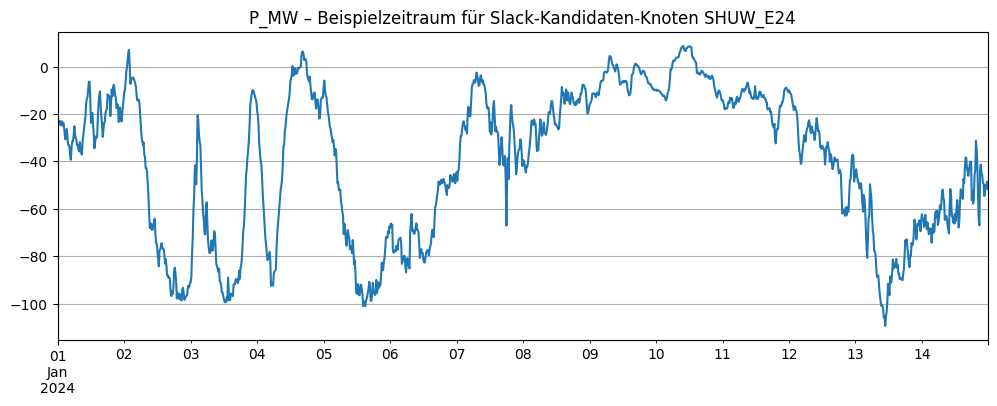

In [14]:
# ===============================================================
# Slack-Kandidaten: Knoten mit „meistem Durchsatz“
# Basis: historische Leistungswerte P_MW aus clean["measurements"]
# ===============================================================

from src.main import main
import pandas as pd
import numpy as np

# ---------------------------------------------------------------
# 1) Daten laden
# ---------------------------------------------------------------
res = main(run_full_pipeline=False)
clean = res["clean"]

meas = clean["measurements"]  # dict: node_id -> Series (P_MW)
print(f"Anzahl Knoten mit Messwerten: {len(meas)}")

# Zeitauflösung (15min -> 0.25 h)
HOURS_PER_STEP = 0.25  # 15 Minuten

# ---------------------------------------------------------------
# 2) Kennzahlen je Knoten berechnen
#    - mean_P_MW: mittlere Wirkleistung (kann + / - sein)
#    - max_P_MW: maximal eingespeiste Leistung
#    - min_P_MW: maximal aufgenommene Leistung
#    - mean_abs_P_MW: mittlere |P|
#    - total_abs_MWh: Summe |P| * Δt  -> "durchgesetzte Energie"
# ---------------------------------------------------------------
stats = []

for node_id, s in meas.items():
    # NaNs raus; für unseren Zweck uninteressant
    s = s.dropna()
    if s.empty:
        continue

    mean_P = s.mean()
    max_P = s.max()
    min_P = s.min()
    mean_abs_P = s.abs().mean()
    total_abs_MWh = s.abs().sum() * HOURS_PER_STEP

    stats.append(
        {
            "node": node_id,
            "mean_P_MW": mean_P,
            "max_P_MW": max_P,
            "min_P_MW": min_P,
            "mean_abs_P_MW": mean_abs_P,
            "total_abs_MWh": total_abs_MWh,
        }
    )

df_nodes = pd.DataFrame(stats).set_index("node")

# ---------------------------------------------------------------
# 3) Ranking nach "Durchsatz" (integrierte |P| in MWh)
# ---------------------------------------------------------------
df_sorted = df_nodes.sort_values("total_abs_MWh", ascending=False)

print("\n--- Top-10 Knoten nach total_abs_MWh (|P| integriert) ---")
display(df_sorted.head(10))

best_node = df_sorted.index[0]
print(f"\n→ Knoten mit größtem Durchsatz (total_abs_MWh): {best_node}")
print(df_sorted.loc[best_node])

# Optional: Wenn du dir diesen Knoten noch einmal zeitlich anschauen willst
import matplotlib.pyplot as plt

s_best = meas[best_node]

plt.figure(figsize=(12, 4))
s_best["2024-01-01":"2024-01-14"].plot()
plt.title(f"P_MW – Beispielzeitraum für Slack-Kandidaten-Knoten {best_node}")
plt.grid(True)
plt.show()


In [15]:
from src.network.network_model import load_network_model

net = load_network_model()

best_node = df_sorted.index[0]  # dein Top-Durchsatz-Knoten aus der vorherigen Auswertung

# Kandidaten-Busbar suchen: alle Kanten, die best_node berühren
adj_edges = net.lines[
    (net.lines["from_node"] == best_node) | (net.lines["to_node"] == best_node)
]

# Knoten-Tabelle (mit Spalte 'type')
nodes_df = net.nodes  # index = node_id, col 'type'

busbar_candidates = set()

for _, e in adj_edges.iterrows():
    other = e["to_node"] if e["from_node"] == best_node else e["from_node"]
    if nodes_df.loc[other, "type"] == "busbar":
        busbar_candidates.add(other)

if len(busbar_candidates) == 1:
    slack_node = list(busbar_candidates)[0]
    print(f"Slack-Knoten: Sammelschiene {slack_node} (verbunden mit {best_node})")
elif len(busbar_candidates) > 1:
    print("Mehrere Busbars angrenzend, bitte eine auswählen:", busbar_candidates)
    slack_node = best_node  # Fallback-Regel
else:
    slack_node = best_node
    print(f"Keine Busbar angrenzend – nutze direkt {best_node} als Slack.")

# slack_node kannst du dann an load_network_model(slack_node=...) übergeben


2025-12-08 15:08:39 [INFO] src.network.network_model - Lade Netzgraph aus C:\Users\M97947\OneDrive - E.ON\Dokumente\Thesis\Code_Github\masterthesis\src\data\raw\graph\whole_graph.json ...
2025-12-08 15:08:39 [INFO] src.network.network_model - Graph geladen (Listenformat): 29 Nodes, 29 Edges.
2025-12-08 15:08:39 [INFO] src.network.network_model - Nodes-DataFrame aufgebaut: 29 Knoten (Index=id).
2025-12-08 15:08:39 [WARNING] src.network.network_model - Leitung SHUW_SS_E23 (SHUW -> SHUW_E23) hat keine Reaktanz (X_total_ohm/X_ohm_per_km) – wird vorerst übersprungen.
2025-12-08 15:08:39 [WARNING] src.network.network_model - Leitung SHUW_SS_E24 (SHUW -> SHUW_E24) hat keine Reaktanz (X_total_ohm/X_ohm_per_km) – wird vorerst übersprungen.
2025-12-08 15:08:39 [WARNING] src.network.network_model - Leitung JUBO_E01_JUBO (JUBO -> JUBO_E01) hat keine Reaktanz (X_total_ohm/X_ohm_per_km) – wird vorerst übersprungen.
2025-12-08 15:08:39 [WARNING] src.network.network_model - Leitung JUBO_E02_JUBO (JUBO

Keine Busbar angrenzend – nutze direkt SHUW_E24 als Slack.


In [1]:
from src.utils.logging_config import setup_logging
from src.network.network_model import load_network_model

setup_logging()

net = load_network_model()   # nutzt jetzt SLACK_NODE_ID aus config

print("Slack-Knoten:", net.slack_node)
print("Nodes:", net.nodes.shape)
print("Lines:", net.lines.shape)
print("A:", net.A.shape, "Bbus:", net.Bbus.shape, "Ar:", net.Ar.shape, "B_rr:", net.B_rr.shape)


2025-12-08 15:24:29 [INFO] src.utils.logging_config - Logging initialisiert. Logfile: logs\service.log
2025-12-08 15:24:29 [INFO] src.network.network_model - Lade Netzgraph aus C:\Users\M97947\OneDrive - E.ON\Dokumente\Thesis\Code_Github\masterthesis\src\data\raw\graph\whole_graph.json ...
2025-12-08 15:24:29 [INFO] src.network.network_model - Graph geladen (Listenformat): 29 Nodes, 29 Edges.
2025-12-08 15:24:29 [INFO] src.network.network_model - Nodes-DataFrame aufgebaut: 29 Knoten (Index=id).
2025-12-08 15:24:29 [WARNING] src.network.network_model - Leitung SHUW_SS_E23 (SHUW -> SHUW_E23) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
2025-12-08 15:24:29 [WARNING] src.network.network_model - Leitung SHUW_SS_E24 (SHUW -> SHUW_E24) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
2025-12-08 15:24:29 [WARNING] src.network.network_model - Leitung JUBO_E01_JUBO (JUBO -> JUBO_E01) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
2025-1

Slack-Knoten: SHUW
Nodes: (29, 12)
Lines: (15, 11)
A: (15, 29) Bbus: (29, 29) Ar: (15, 28) B_rr: (28, 28)


## PTDF

In [1]:
from src.utils.logging_config import setup_logging
from src.network.network_model import load_network_model
from src.network.ptdf import compute_ptdf

setup_logging()

net = load_network_model()

H_rel = compute_ptdf(
    net,
    relevant_only=True,
    use_pinv=True,   # <--- wichtiger Parameter
)

print("Slack-Knoten:", net.slack_node)
print("PTDF-Shape:", H_rel.shape)
display(H_rel.head())


Slack-Knoten: SHUW
PTDF-Shape: (15, 16)


,BOLN_E01,BOLN_E02,BOLN_E03,BOLS_E41,BOLS_E42,JUBO_E01,JUBO_E02,JUBO_E03,SHUW_E23,SHUW_E24,SIES_E02,SIEV_E01,TARP_E01,TARP_E03,WEDING_E12,WEDING_E14
id,,,,,,,,,,,,,,,,
"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLN A3-BOLN",2.172407e-14,-0.9,4.862238e-15,0.1,-3.871519e-15,7.358538e-17,1.499263e-31,-7.585368e-30,0.1,1.348084e-15,0.1,0.1,-1.575023e-15,0.0,0.1,0.0
"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLN A3-SIES A3",-3.678906e-13,-0.5,-1.430818e-14,-0.5,-3.612697e-14,-1.826330e-14,-2.335892e-30,1.385369e-27,-0.5,-1.989113e-14,0.5,0.5,-2.418675e-14,0.0,0.5,0.0
"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLN A3",4.113445e-13,-0.3,2.395370e-14,0.7,2.802621e-14,1.749851e-14,2.635345e-30,-1.400529e-27,0.7,1.843532e-14,-0.3,-0.3,2.103942e-14,0.0,-0.3,0.0
"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLS",1.406088e-13,-0.1,1.225696e-15,0.9,1.339597e-14,6.078661e-15,7.978004e-31,-3.781460e-28,-0.1,6.613231e-15,-0.1,-0.1,8.479234e-15,0.0,-0.1,0.0
"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SHUW-BOLN A3",1.310324e-13,-0.1,2.135084e-14,-0.1,1.291639e-15,5.438551e-15,1.039865e-30,-6.444569e-28,0.9,5.005000e-15,-0.1,-0.1,4.066276e-15,0.0,-0.1,0.0


In [1]:
from src.network.network_model import load_network_model
from src.network.ptdf import compute_ptdf_full, check_ptdf_kcl, debug_single_injection

net = load_network_model()
H_full = compute_ptdf_full(net, use_pinv=True)

# 1) KCL-Check über alle Nicht-Slack-Knoten
check_ptdf_kcl(net, H_full, sample_nodes=None, tol=1e-8)

# 2) Einzel-Injektion debuggen
flows, kcl_vec = debug_single_injection(net, H_full, node_id="SHUW_E24")
display(flows.head())
display(kcl_vec)


Leitung SHUW_SS_E23 (SHUW -> SHUW_E23) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung SHUW_SS_E24 (SHUW -> SHUW_E24) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E01_JUBO (JUBO -> JUBO_E01) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E02_JUBO (JUBO_E02 -> JUBO) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E03_JUBO (JUBO_E03 -> JUBO) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung TARP_SS_TARP_E01 (TARP_E01 -> TARP) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung TARP_SS_TARP_E03 (TARP -> TARP_E03) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung WEDING_SS_WEDING_E14 (WEDING_E14 -> WEDING) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung WEDING_SS_WEDING_E12 (WEDING_E12 -> WEDING) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leit

id
110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLN A3-BOLN       5.932523e-16
110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLN A3-SIES A3    5.329150e-15
110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLN A3   -3.932672e-15
110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLS      -8.645290e-15
110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SHUW-BOLN A3       1.302555e-14
Name: flow_per_1MW, dtype: float64

BOLN          0.000000e+00
BOLN_A3      -8.032262e-16
BOLN_E01      0.000000e+00
BOLN_E02     -5.932523e-16
BOLN_E03      0.000000e+00
BOLS_A3      -8.312935e-15
BOLS_A5      -1.666667e-01
BOLS_E41     -8.645290e-15
BOLS_E42     -1.666667e-01
JUBO          0.000000e+00
JUBO_A5      -1.666667e-01
JUBO_E01     -1.666667e-01
JUBO_E02      0.000000e+00
JUBO_E03      0.000000e+00
SHUW_E23      1.302555e-14
SHUW_E24      8.333333e-01
SIES          0.000000e+00
SIES_A3       1.317594e-15
SIES_E02      2.545127e-17
SIEV          0.000000e+00
SIEV_A3       5.554123e-15
SIEV_E01      4.476351e-15
TARP          0.000000e+00
TARP_E01     -1.666667e-01
TARP_E03      0.000000e+00
WEDING        0.000000e+00
WEDING_E12   -6.044368e-15
WEDING_E14    0.000000e+00
Name: kcl_balance, dtype: float64

### flows

In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
from src.network.network_model import load_network_model
from src.network.ptdf import compute_ptdf

# Netzmodell laden (Slack kommt aus config.py)
net = load_network_model()

# PTDF für relevante Knoten berechnen (uw_field + battery)
H_rel = compute_ptdf(net, relevant_only=True)

# Knoten, für die wir Zeitreihen benötigen
relevant_nodes = list(H_rel.columns)

print("Relevante Knoten:", relevant_nodes)
print("Shape H_rel:", H_rel.shape)

# --------------------------------------------------
# Pfad zu den Zeitreihen & Spaltennamen
# --------------------------------------------------
MEAS_DIR = Path("src/data/raw/timeseries")  # ggf. anpassen

# Spaltennamen in den CSV-Dateien anpassen, falls nötig
TS_COL  = "timestamp"       # Zeitstempel-Spalte
VAL_COL = "P_MW"  # Leistungs-Spalte (z.B. in MW)

print(f"MEAS_DIR: {MEAS_DIR}")
if not MEAS_DIR.exists():
    raise FileNotFoundError(f"MEAS_DIR existiert nicht: {MEAS_DIR}")

all_csv = sorted(p.name for p in MEAS_DIR.glob("*.csv"))
print(f"Gefundene CSV-Dateien: {len(all_csv)}")
for name in all_csv:
    print("-", name)


# --------------------------------------------------
# Loader: lädt <node>.csv oder <node>_hist.csv
# --------------------------------------------------
def load_series(node_id: str) -> pd.Series | None:
    """
    Lädt die Zeitreihe für einen Knoten aus
        <MEAS_DIR>/<node_id>.csv  oder
        <MEAS_DIR>/<node_id>_hist.csv

    Erwartet eine Zeitspalte TS_COL und eine Wertspalte VAL_COL.
    """
    candidates = [
        MEAS_DIR / f"{node_id}.csv",
        MEAS_DIR / f"{node_id}_hist.csv",
    ]

    path = None
    for c in candidates:
        if c.exists():
            path = c
            break

    if path is None:
        print(f"[MISS] Keine Datei für Node {node_id} gefunden (weder *.csv noch *_hist.csv).")
        return None

    df = pd.read_csv(path)
    print(f"[LOAD] {node_id}: {path.name} | Spalten = {list(df.columns)}")

    if TS_COL not in df.columns or VAL_COL not in df.columns:
        print(f"[SKIP] {path.name} hat nicht TS_COL={TS_COL} und VAL_COL={VAL_COL}.")
        return None

    df[TS_COL] = pd.to_datetime(df[TS_COL], errors="coerce", utc=True)
    df = df.dropna(subset=[TS_COL, VAL_COL])
    if df.empty:
        print(f"[EMPTY] {path.name} hat nach Cleaning keine gültigen Zeilen.")
        return None

    s = (
        df.set_index(TS_COL)[VAL_COL]
        .astype(float)
        .tz_convert(None)
        .sort_index()
    )
    print(f"[OK]   {node_id}: {len(s)} Punkte.")
    return s


# --------------------------------------------------
# Zeitreihen für relevante Knoten laden
# --------------------------------------------------
# Annahme: relevant_nodes kommt z.B. aus H_rel.columns
try:
    relevant_nodes = list(H_rel.columns)
except NameError:
    raise RuntimeError("relevant_nodes ist nicht definiert – typischerweise: relevant_nodes = list(H_rel.columns)")

series_dict: dict[str, pd.Series] = {}

print("\n--- Lade Zeitreihen für relevante Knoten ---")
for nid in relevant_nodes:
    s = load_series(nid)
    if s is None or s.empty:
        continue
    series_dict[nid] = s

print("\n--- Zusammenfassung ---")
print(f"Knoten mit vorhandener Zeitreihe: {len(series_dict)}")
print("Nodes:", sorted(series_dict.keys()))

if not series_dict:
    raise RuntimeError(
        "Keine Zeitreihen für relevante Knoten geladen. "
        "Prüfe MEAS_DIR, Dateinamen und Spaltennamen (TS_COL/VAL_COL)."
    )

# --------------------------------------------------
# Gemeinsame Zeitbasis (inner join)
# --------------------------------------------------
df_P = pd.concat(series_dict.values(), axis=1, join="inner")
df_P.columns = list(series_dict.keys())

print("\n---- Zeitreihen-Matrix df_P ----")
print("Gemeinsame Zeitpunkte:", len(df_P))
print("Knoten mit Messwerten:", df_P.shape[1])
display(df_P.head())


Leitung SHUW_SS_E23 (SHUW -> SHUW_E23) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung SHUW_SS_E24 (SHUW -> SHUW_E24) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E01_JUBO (JUBO -> JUBO_E01) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E02_JUBO (JUBO_E02 -> JUBO) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E03_JUBO (JUBO_E03 -> JUBO) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung TARP_SS_TARP_E01 (TARP_E01 -> TARP) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung TARP_SS_TARP_E03 (TARP -> TARP_E03) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung WEDING_SS_WEDING_E14 (WEDING_E14 -> WEDING) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung WEDING_SS_WEDING_E12 (WEDING_E12 -> WEDING) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leit

Relevante Knoten: ['BOLN_E01', 'BOLN_E02', 'BOLN_E03', 'BOLS_E41', 'BOLS_E42', 'JUBO_E01', 'JUBO_E02', 'JUBO_E03', 'SHUW_E23', 'SHUW_E24', 'SIES_E02', 'SIEV_E01', 'TARP_E01', 'TARP_E03', 'WEDING_E12', 'WEDING_E14']
Shape H_rel: (15, 16)
MEAS_DIR: src/data/raw/timeseries
Gefundene CSV-Dateien: 15
- BOLN_E01_hist.csv
- BOLN_E02_hist.csv
- BOLN_E03_hist.csv
- BOLS_E41_hist.csv
- BOLS_E42_hist.csv
- JUBO_E02_hist.csv
- JUBO_E03_hist.csv
- SHUW_E23_hist.csv
- SHUW_E24_hist.csv
- SIES_E02_hist.csv
- SIEV_E01_hist.csv
- Tarp_E01_hist.csv
- Tarp_E03_hist.csv
- Weding_E12_hist.csv
- Weding_E14_hist.csv

--- Lade Zeitreihen für relevante Knoten ---
[LOAD] BOLN_E01: BOLN_E01_hist.csv | Spalten = ['timestamp', 'P_MW', 'temperature_C', 'wind_speed_mps', 'solar_radiation_Wm2']
[OK]   BOLN_E01: 65476 Punkte.
[LOAD] BOLN_E02: BOLN_E02_hist.csv | Spalten = ['timestamp', 'temperature_C', 'wind_speed_mps', 'solar_radiation_Wm2']
[SKIP] BOLN_E02_hist.csv hat nicht TS_COL=timestamp und VAL_COL=P_MW.
[LOAD]

,BOLN_E01,BOLN_E03,BOLS_E41,BOLS_E42,JUBO_E02,JUBO_E03,SHUW_E23,SHUW_E24,SIES_E02,SIEV_E01,TARP_E01,TARP_E03,WEDING_E12,WEDING_E14
timestamp,,,,,,,,,,,,,,
2025-07-02 15:30:00,-1.060031,-2.760247,-0.049500,0.311850,-5.738144,-10.248208,-29.517407,-35.888707,-1.325459,-24.168873,20.000000,4.333333,-0.991650,-4.816350
2025-07-02 15:45:00,-3.034188,-8.116977,-0.049500,4.865847,-18.515167,-16.038347,-32.450693,-56.824393,-2.999312,-23.523267,18.266667,10.666667,-6.948147,-11.421297
2025-07-02 16:00:00,-6.074335,-18.029455,-41.334133,-5.888849,-30.232387,-14.651100,-11.311915,-62.848493,-5.405685,-27.280027,23.200000,17.066667,-4.796550,-17.250740
2025-07-02 16:15:00,-5.970118,-18.928687,-46.426060,-6.071170,-18.431800,-9.688532,-4.489510,-42.408253,-5.093024,-16.857033,21.000000,4.533333,3.598650,-4.775100
2025-07-02 16:30:00,-2.161747,-8.441539,-46.861627,18.003157,-8.771635,-6.663969,11.121135,-44.953487,-2.117162,-9.165937,11.600000,3.600000,13.472237,-3.870907


In [2]:
from pathlib import Path
from src.network.network_model import load_network_model
from src.network.flows import build_flows_timeseries

net = load_network_model()  # nutzt Slack aus config.py
meas_dir = Path("src/data/raw/timeseries")

df_F, H_rel, df_P = build_flows_timeseries(
    net=net,
    meas_dir=meas_dir,
    relevant_only=True,   # nur uw_field + battery
    use_pinv=False,       # oder True, wenn du magst
)

df_F.head()


Leitung SHUW_SS_E23 (SHUW -> SHUW_E23) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung SHUW_SS_E24 (SHUW -> SHUW_E24) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E01_JUBO (JUBO -> JUBO_E01) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E02_JUBO (JUBO_E02 -> JUBO) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E03_JUBO (JUBO_E03 -> JUBO) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung TARP_SS_TARP_E01 (TARP_E01 -> TARP) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung TARP_SS_TARP_E03 (TARP -> TARP_E03) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung WEDING_SS_WEDING_E14 (WEDING_E14 -> WEDING) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung WEDING_SS_WEDING_E12 (WEDING_E12 -> WEDING) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leit

id,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLN A3-BOLN","110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLN A3-SIES A3","110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLN A3","110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLS","110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SHUW-BOLN A3","110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SIES A3-SIES","110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SIEV A3-SIES A3","110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SIEV A3-SIEV","110-SHUW-WEDI-ROT,BOLN,SIES,SIEV WEDI-SIEV A3",110-TARP-WEDI-GRUEN TARP-WEDI,110_SHUW_TARP_GELB_JUBO_BOLS_A5_BOLS,110_SHUW_TARP_GELB_JUBO_BOLS_A5_TARP,110_SHUW_TARP_GELB_JUBO_JUBO_A5_BOLS_A5,110_SHUW_TARP_GELB_JUBO_JUBO_A5_JUBO,110_SHUW_TARP_GELB_JUBO_SHUW_JUBO_A5
timestamp,,,,,,,,,,,,,,,
2025-07-02 15:30:00,-5.605289,1.540462,-12.751040,5.555789,-23.912118,-4.279830,8.344657,18.563584,4.613639,4.574842,-2.907993,22.596143,-28.100278,2.596143,33.292564
2025-07-02 15:45:00,-6.597092,-0.485266,-12.708918,6.547592,-25.853601,-3.597780,10.680138,16.926175,-0.351055,11.043982,-10.481161,23.881980,-39.978454,5.615313,51.209080
2025-07-02 16:00:00,-9.012831,7.581893,-25.607555,-32.321302,-2.299084,-3.607146,5.038083,18.267196,4.216281,17.158703,-1.700708,30.789557,-40.079822,7.589557,55.258936
2025-07-02 16:15:00,-6.926698,16.282081,-30.135477,-39.499362,2.437188,-1.833674,-7.521710,9.930336,10.525348,4.654217,1.491266,25.579904,-28.668542,4.579904,37.828349
2025-07-02 16:30:00,-3.355135,18.964814,-25.675085,-43.506491,14.476271,-1.237973,-14.371706,5.810802,16.827372,3.735453,-20.561545,14.158388,-37.278322,2.558388,42.395098


In [2]:
import os
import pandas as pd
import numpy as np

# Pfad zum Timeseries-Ordner
MEAS_DIR = r"src/data/raw/timeseries"

TS_COL = "timestamp"
VAL_COL = "P_MW"

# -----------------------------
# 1) Batterie laden
# -----------------------------
bess_file = "BOLS_E42_hist.csv"   # oder z.B. "BOLS_A5_hist.csv"
bess_path = os.path.join(MEAS_DIR, bess_file)

bess = pd.read_csv(bess_path, parse_dates=[TS_COL])
bess = bess[[TS_COL, VAL_COL]].rename(columns={VAL_COL: "BESS_P"})
bess = bess.sort_values(TS_COL).set_index(TS_COL)


# -----------------------------
# 2) Alle anderen Nodes laden
# -----------------------------
correlations = {}

for fname in os.listdir(MEAS_DIR):
    if not fname.endswith("_hist.csv"):
        continue
    if fname == bess_file:
        continue

    path = os.path.join(MEAS_DIR, fname)
    df = pd.read_csv(path, parse_dates=[TS_COL])
    df = df[[TS_COL, VAL_COL]].sort_values(TS_COL).set_index(TS_COL)

    # gemeinsame Zeitbasis finden
    merged = bess.join(df, how="inner", rsuffix="_other")

    if len(merged) < 100:   # zu wenige Samples, überspringen
        continue

    corr = merged["BESS_P"].corr(merged[VAL_COL])
    correlations[fname.replace("_hist.csv", "")] = corr


# -----------------------------
# 3) Sortiert ausgeben
# -----------------------------
s = pd.Series(correlations).sort_values(key=np.abs, ascending=False)
print("Korrelation zwischen Batterie-P und allen anderen Knoten:")
print(s)


Korrelation zwischen Batterie-P und allen anderen Knoten:
BOLS_E41      0.940766
TARP_E01     -0.447962
SHUW_E23     -0.440713
WEDING_E12   -0.430709
WEDING_E14   -0.320049
SHUW_E24     -0.318354
TARP_E03      0.316852
SIEV_E01      0.255469
JUBO_E03      0.232275
JUBO_E01     -0.145870
JUBO_E02      0.069637
SIES_E02      0.049523
BOLN_E03     -0.049197
BOLN_E02      0.048678
BOLN_E01     -0.016657
dtype: float64


### bess-cleaning using just regression

BESS-Zeitreihe geladen: BOLS_E42_hist.csv, Samples: 68112
Korrelationen VOR Bereinigung (BESS_P vs. Node):
BOLS_E41      0.940766
TARP_E01     -0.447962
SHUW_E23     -0.440713
WEDING_E12   -0.430709
WEDING_E14   -0.320049
SHUW_E24     -0.318354
TARP_E03      0.316852
SIEV_E01      0.255469
JUBO_E03      0.232275
JUBO_E01     -0.145870
JUBO_E02      0.069637
SIES_E02      0.049523
BOLN_E03     -0.049197
BOLN_E02      0.048678
BOLN_E01     -0.016657
dtype: float64

Zusammenfassung Regression & Bereinigung:
      node  corr_before    corr_after      beta      alpha       r2  mean_abs_removed_MW  is_bess_uw_field
  BOLS_E41     0.940766  9.247196e-04  0.942776  -0.048351 0.885040            13.090777              True
  TARP_E01    -0.447962 -1.442284e-04 -0.367999  20.028707 0.796828             5.109797             False
  SHUW_E23    -0.440713 -2.745527e-04 -0.505464 -27.813207 0.751213             7.018543             False
WEDING_E12    -0.430709 -2.116053e-03 -0.273330   5.094285 0.1

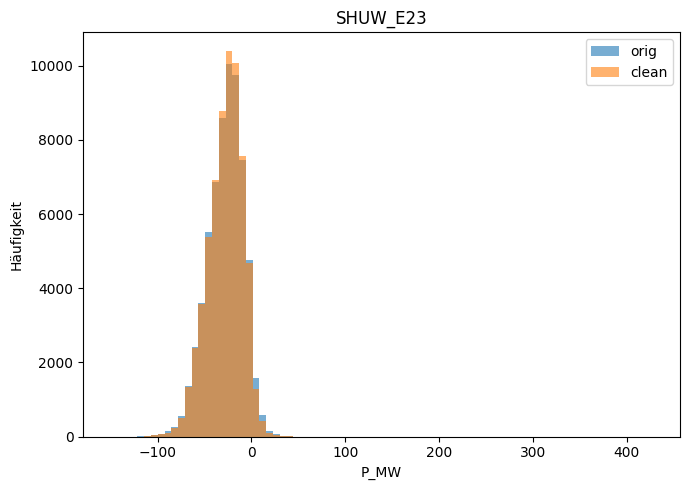

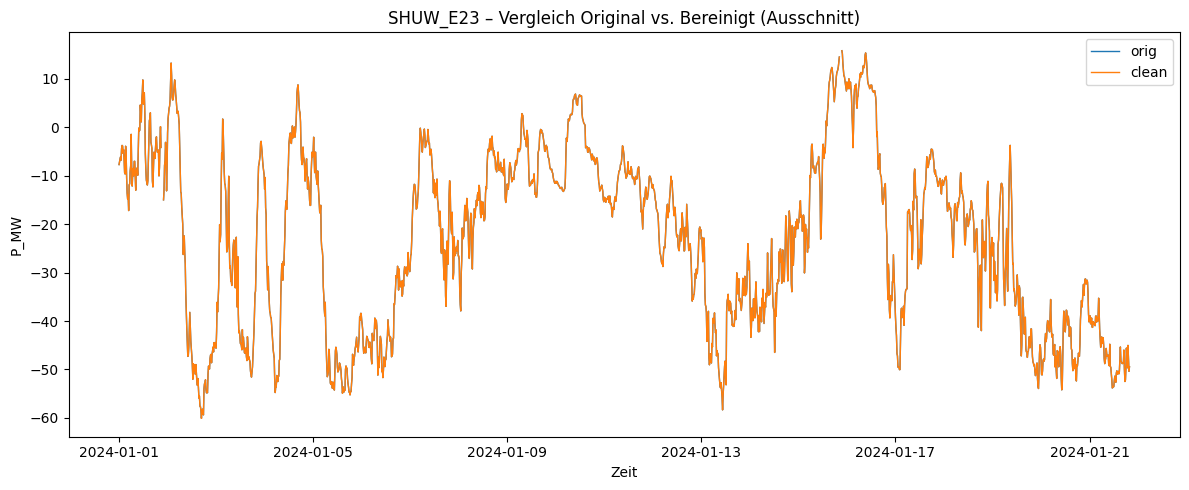

In [10]:
# %%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# KONFIGURATION
# ============================

MEAS_DIR = r"src/data/raw/timeseries"
TS_COL = "timestamp"
VAL_COL = "P_MW"

# Datei mit BESS-Leistung
BESS_FILE = "BOLS_E42_hist.csv"

# >>> HIER SELBST PFLEGEN <<<
# Namen (ohne _hist.csv) der UW-Felder direkt am BESS-Umspannwerk
BESS_UW_FIELDS = [
    "BOLS_E41",
    "BOLS_E42",   # BESS selbst
    # "BOLS_E43",
]

# Node für Beispielplots
PLOT_NODE = "SHUW_E23"   # kannst du anpassen

# %%
# ============================
# 1) BESS laden
# ============================

bess_path = os.path.join(MEAS_DIR, BESS_FILE)

bess = pd.read_csv(bess_path, parse_dates=[TS_COL])
bess = bess[[TS_COL, VAL_COL]].rename(columns={VAL_COL: "BESS_P"})
bess = bess.sort_values(TS_COL).set_index(TS_COL)

print(f"BESS-Zeitreihe geladen: {BESS_FILE}, Samples: {len(bess)}")

# %%
# ============================
# 2) Hilfsfunktion: lineare Regression
#    y ≈ alpha + beta * x
# ============================

def fit_simple_linear_regression(x: pd.Series, y: pd.Series):
    """
    Einfache OLS-Regression:
        y ≈ alpha + beta * x

    Rückgabe:
      alpha, beta, r2
    """
    x = x.astype(float)
    y = y.astype(float)

    mx = x.mean()
    my = y.mean()

    cov_xy = ((x - mx) * (y - my)).sum()
    var_x = ((x - mx) ** 2).sum()

    if var_x == 0:
        beta = 0.0
    else:
        beta = cov_xy / var_x

    alpha = my - beta * mx

    # R^2
    y_hat = alpha + beta * x
    ss_res = ((y - y_hat) ** 2).sum()
    ss_tot = ((y - my) ** 2).sum()
    r2 = 1 - ss_res / ss_tot if ss_tot > 0 else np.nan

    return alpha, beta, r2

# %%
# ============================
# 3) Korrelationen VOR Bereinigung
# ============================

correlations_before = {}
orig_series = {}   # komplette Original-Serien pro Node (eigener Index)

for fname in os.listdir(MEAS_DIR):
    if not fname.endswith("_hist.csv"):
        continue
    if fname == BESS_FILE:
        continue  # BESS selbst überspringen

    node_name = fname.replace("_hist.csv", "")
    path = os.path.join(MEAS_DIR, fname)

    df = pd.read_csv(path, parse_dates=[TS_COL])
    df = df[[TS_COL, VAL_COL]].sort_values(TS_COL).set_index(TS_COL)

    # Original-Zeitreihe (voll) merken
    orig_series[node_name] = df[VAL_COL]

    # Für Korrelation nur gemeinsame Zeitbasis mit BESS
    merged = bess.join(df, how="inner", rsuffix="_other")
    if len(merged) < 100:
        continue

    corr_before = merged["BESS_P"].corr(merged[VAL_COL])
    correlations_before[node_name] = corr_before

print("Korrelationen VOR Bereinigung (BESS_P vs. Node):")
s_before = pd.Series(correlations_before).sort_values(key=np.abs, ascending=False)
print(s_before)

# %%
# ============================
# 4) Regression + Bereinigung auf voller Node-Zeitreihe
#    P_node_clean(t) = P_node(t) - beta * P_BESS(t)
#    BESS-Werte, die fehlen -> 0  (dort keine Korrektur)
# ============================

results = []
clean_series = {}

for node_name, corr_before in correlations_before.items():
    fname = f"{node_name}_hist.csv"
    path = os.path.join(MEAS_DIR, fname)

    df = pd.read_csv(path, parse_dates=[TS_COL])
    df = df[[TS_COL, VAL_COL]].sort_values(TS_COL).set_index(TS_COL)

    # 1) Für REGRESSION: nur Schnittmenge Node & BESS
    merged = bess.join(df, how="inner", rsuffix="_other")
    if len(merged) < 100:
        continue

    x_reg = merged["BESS_P"]
    y_reg = merged[VAL_COL]

    alpha, beta, r2 = fit_simple_linear_regression(x_reg, y_reg)

    # 2) Für BEREINIGUNG: auf voller Node-Zeitreihe arbeiten
    #    BESS auf Node-Index legen (Roh-Version mit NaNs)
    bess_on_node_idx_raw = bess.reindex(df.index)["BESS_P"]
    # Version mit NaN->0 für die tatsächliche Korrektur
    bess_on_node_idx = bess_on_node_idx_raw.fillna(0.0)

    y_full = df[VAL_COL]
    y_clean_full = y_full - beta * bess_on_node_idx

    # 3) Korrelation NACH Bereinigung: nur auf Zeiten mit BESS-Wert
    mask = ~bess_on_node_idx_raw.isna()
    if mask.sum() >= 10:
        corr_after = bess_on_node_idx_raw[mask].corr(y_clean_full[mask])
    else:
        corr_after = np.nan

    # mittlere entfernte Leistung (nur dort, wo BESS Daten hat, also x_reg)
    mean_abs_removed = (beta * x_reg).abs().mean()

    clean_series[node_name] = y_clean_full

    is_bess_uw = node_name in BESS_UW_FIELDS

    results.append({
        "node": node_name,
        "corr_before": corr_before,
        "corr_after": corr_after,
        "beta": beta,
        "alpha": alpha,
        "r2": r2,
        "mean_abs_removed_MW": mean_abs_removed,
        "is_bess_uw_field": is_bess_uw,
    })

# %%
# ============================
# 5) Ergebnis-Tabelle
# ============================

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="corr_before", key=np.abs, ascending=False)

print("\nZusammenfassung Regression & Bereinigung:")
print(results_df.to_string(index=False))

# %%
# ============================
# 6) DataFrames mit Original & Bereinigt
# ============================

orig_df = pd.DataFrame(orig_series)
clean_df = pd.DataFrame(clean_series)

# Korrelationen vor/nach: jeweils nur auf Schnitt mit BESS
corr_before_full = (
    orig_df.join(bess, how="inner")
           .corr()["BESS_P"]
           .drop("BESS_P")
)

corr_after_full = (
    clean_df.join(bess, how="inner")
            .corr()["BESS_P"]
            .drop("BESS_P")
)

print("\nKorrelationsvergleich (BESS_P vs. Nodes):")
corr_compare = pd.DataFrame({
    "corr_before": corr_before_full,
    "corr_after": corr_after_full
}).sort_values(by="corr_before", key=np.abs, ascending=False)

print(corr_compare)

# %%
# ============================
# 7) Beispiel-Statistiken für einen Node
# ============================

if PLOT_NODE in orig_df.columns and PLOT_NODE in clean_df.columns:
    print(f"\nDescriptive Stats für {PLOT_NODE} (ORIG):")
    print(orig_df[PLOT_NODE].describe())
    print(f"\nDescriptive Stats für {PLOT_NODE} (CLEAN):")
    print(clean_df[PLOT_NODE].describe())
else:
    print(f"\nWARNUNG: {PLOT_NODE} nicht in Daten gefunden.")

# %%
# ============================
# 8) Histogramm-Vergleich für einen Node
# ============================

if PLOT_NODE in orig_df.columns and PLOT_NODE in clean_df.columns:
    plt.figure(figsize=(7, 5))
    plt.hist(orig_df[PLOT_NODE].dropna(), bins=80, alpha=0.6, label="orig")
    plt.hist(clean_df[PLOT_NODE].dropna(), bins=80, alpha=0.6, label="clean")
    plt.title(PLOT_NODE)
    plt.xlabel("P_MW")
    plt.ylabel("Häufigkeit")
    plt.legend()
    plt.tight_layout()
    plt.show()

# %%
# ============================
# 9) Zeitreihen-Vergleich (Ausschnitt)
# ============================

if PLOT_NODE in orig_df.columns and PLOT_NODE in clean_df.columns:
    # irgendein Zeitraum wählen (z.B. erste 2000 Punkte)
    slice_idx = orig_df.index[:2000]

    plt.figure(figsize=(12, 5))
    plt.plot(slice_idx, orig_df.loc[slice_idx, PLOT_NODE], label="orig", linewidth=1)
    plt.plot(slice_idx, clean_df.loc[slice_idx, PLOT_NODE], label="clean", linewidth=1)
    plt.title(f"{PLOT_NODE} – Vergleich Original vs. Bereinigt (Ausschnitt)")
    plt.xlabel("Zeit")
    plt.ylabel("P_MW")
    plt.legend()
    plt.tight_layout()
    plt.show()


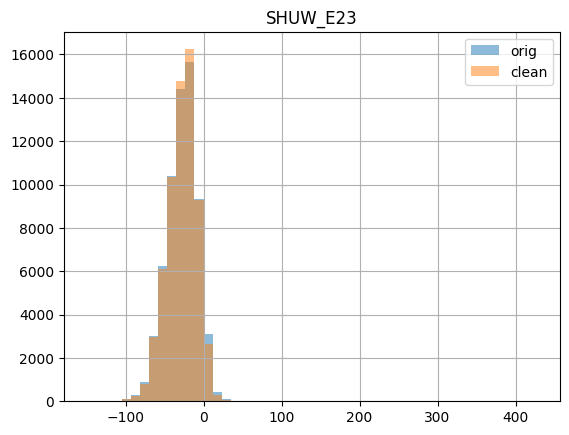

In [11]:
import matplotlib.pyplot as plt

node = "SHUW_E23"
orig_df[node].hist(bins=50, alpha=0.5, label="orig")
clean_df[node].hist(bins=50, alpha=0.5, label="clean")
plt.legend()
plt.title(node)
plt.show()


### bess cleaning using ptdf and regression in comparision

In [12]:
# %%
import numpy as np
import pandas as pd

# ---- Parameter ----
FIELD_DEBUG = "BOLS_E41"   # oder "SHUW_E23"
TOPK = 30

A = net.A
lines = net.lines

print("Slack:", net.slack_node)
print("BESS_NODE:", BESS_NODE, "| in H.columns:", BESS_NODE in H.columns)
print("FIELD_DEBUG:", FIELD_DEBUG, "| in A.columns:", FIELD_DEBUG in A.columns)

# 1) Alle inzidenten Leitungen am Feld + PTDF(line, BESS)
if FIELD_DEBUG in A.columns:
    inc = A.index[A[FIELD_DEBUG] != 0].tolist()
    inc = [l for l in inc if l in H.index]
    if not inc:
        print("Keine inzidenten Leitungen (oder keine in H.index).")
    else:
        df_inc = pd.DataFrame({
            "line_id": inc,
            "A_sign": A.loc[inc, FIELD_DEBUG].astype(float).values,
            "from_node": lines.loc[inc, "from_node"].values,
            "to_node": lines.loc[inc, "to_node"].values,
            "PTDF_line_BESS": H.loc[inc, BESS_NODE].astype(float).values,
            "abs_PTDf": H.loc[inc, BESS_NODE].astype(float).abs().values,
        }).sort_values("abs_PTDf", ascending=False)

        print(f"\nInzidente Leitungen an {FIELD_DEBUG} (sortiert nach |PTDF|):")
        display(df_inc)
else:
    print("FIELD_DEBUG nicht in A.columns")

# 2) Global: Leitungen mit größtem |PTDF(:, BESS)|
ptdf_bess = H[BESS_NODE].astype(float)
top_lines = ptdf_bess.abs().sort_values(ascending=False).head(TOPK).index.tolist()

df_top = pd.DataFrame({
    "line_id": top_lines,
    "PTDF_line_BESS": ptdf_bess.loc[top_lines].values,
    "from_node": lines.loc[top_lines, "from_node"].values,
    "to_node": lines.loc[top_lines, "to_node"].values,
    "length_km": lines.loc[top_lines, "length_km"].values if "length_km" in lines.columns else np.nan,
}).sort_values("PTDF_line_BESS", key=np.abs, ascending=False)

print(f"\nTop {TOPK} Leitungen nach |PTDF(line, BESS)|:")
display(df_top)


Slack: SHUW
BESS_NODE: BOLS_E42 | in H.columns: True
FIELD_DEBUG: BOLS_E41 | in A.columns: True

Inzidente Leitungen an BOLS_E41 (sortiert nach |PTDF|):


,line_id,A_sign,from_node,to_node,PTDF_line_BESS,abs_PTDf
0,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLS",1.0,BOLS_E41,BOLS_A3,3.029961e-14,3.029961e-14



Top 30 Leitungen nach |PTDF(line, BESS)|:


,line_id,PTDF_line_BESS,from_node,to_node,length_km
0,110_SHUW_TARP_GELB_JUBO_BOLS_A5_BOLS,-8.333333e-01,BOLS_A5,BOLS_E42,NaN
1,110_SHUW_TARP_GELB_JUBO_JUBO_A5_BOLS_A5,-5.000000e-01,JUBO_A5,BOLS_A5,NaN
2,110_SHUW_TARP_GELB_JUBO_JUBO_A5_JUBO,-1.666667e-01,JUBO_E01,JUBO_A5,NaN
3,110_SHUW_TARP_GELB_JUBO_BOLS_A5_TARP,-1.666667e-01,TARP_E01,BOLS_A5,NaN
4,110_SHUW_TARP_GELB_JUBO_SHUW_JUBO_A5,1.666667e-01,JUBO_A5,SHUW_E24,NaN
5,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLN A3",6.544147e-14,BOLS_A3,BOLN_A3,NaN
6,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLN A3-SIES A3",-6.294749e-14,SIES_A3,BOLN_A3,NaN
7,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SIEV A3-SIES A3",4.739117e-14,SIES_A3,SIEV_A3,NaN
8,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLS",3.029961e-14,BOLS_E41,BOLS_A3,NaN
9,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV WEDI-SIEV A3",-1.801397e-14,WEDING_E12,SIEV_A3,NaN


Leitung SHUW_SS_E23 (SHUW -> SHUW_E23) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung SHUW_SS_E24 (SHUW -> SHUW_E24) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E01_JUBO (JUBO -> JUBO_E01) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E02_JUBO (JUBO_E02 -> JUBO) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung JUBO_E03_JUBO (JUBO_E03 -> JUBO) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung TARP_SS_TARP_E01 (TARP_E01 -> TARP) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung TARP_SS_TARP_E03 (TARP -> TARP_E03) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung WEDING_SS_WEDING_E14 (WEDING_E14 -> WEDING) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leitung WEDING_SS_WEDING_E12 (WEDING_E12 -> WEDING) hat keine Reaktanz (X_total_ohm) – wird vorerst mit NaN-x geführt.
Leit

PTDF H: (15, 28) (lines x non-slack nodes) | slack: SHUW
Top 20 |k_j| nach improved mapping:


JUBO_E01     -1.666667e-01
TARP_E01     -1.666667e-01
SHUW_E24      1.666667e-01
BOLS_E41      3.029961e-14
WEDING_E12   -1.801397e-14
SIEV_E01      1.465884e-14
SIES_E02      7.875458e-15
SHUW_E23      4.915734e-15
BOLN_E02      1.154273e-15
WEDING_E14    0.000000e+00
TARP_E03      0.000000e+00
Name: k_j, dtype: float64

PTDF-A (improved mapping) bereinigte Nodes: 11


,node,line_id,k_j,corr_after_ptdfA,mean_abs_removed_MW_ptdfA
0,TARP_E01,110_SHUW_TARP_GELB_JUBO_BOLS_A5_TARP,-1.666667e-01,-0.264428,2.314226e+00
1,SHUW_E23,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SHUW-BOLN A3",4.915734e-15,-0.440713,6.825672e-14
2,WEDING_E14,110-TARP-WEDI-GRUEN TARP-WEDI,0.000000e+00,-0.320049,0.000000e+00
3,BOLS_E41,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLS",3.029961e-14,0.940766,4.207209e-13
4,SHUW_E24,110_SHUW_TARP_GELB_JUBO_SHUW_JUBO_A5,1.666667e-01,-0.410011,2.314226e+00


Vergleich – Regression vs. PTDF-A (improved mapping) Top 30:


,node,line_id,corr_before,corr_after_reg,corr_after_ptdfA,beta,k_j,r2,mean_abs_removed_MW_reg,mean_abs_removed_MW_ptdfA,corr_improvement_reg,corr_improvement_ptdfA
0,BOLS_E41,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV BOLS A3-BOLS",0.940766,9.247196e-04,0.940766,0.942776,3.029961e-14,0.885040,13.090777,4.207209e-13,0.939841,4.440892e-15
1,TARP_E01,110_SHUW_TARP_GELB_JUBO_BOLS_A5_TARP,-0.447962,-1.442284e-04,-0.264428,-0.367999,-1.666667e-01,0.796828,5.109797,2.314226e+00,0.447817,1.835336e-01
2,SHUW_E23,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SHUW-BOLN A3",-0.440713,-2.745527e-04,-0.440713,-0.505464,4.915734e-15,0.751213,7.018543,6.825672e-14,0.440439,-3.774758e-15
3,WEDING_E12,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV WEDI-SIEV A3",-0.430709,-2.116053e-03,-0.430709,-0.273330,-1.801397e-14,0.187857,3.795290,2.501305e-13,0.428593,2.342571e-14
4,WEDING_E14,110-TARP-WEDI-GRUEN TARP-WEDI,-0.320049,-1.561087e-03,-0.320049,-0.224203,0.000000e+00,0.103303,3.113145,0.000000e+00,0.318488,0.000000e+00
5,SHUW_E24,110_SHUW_TARP_GELB_JUBO_SHUW_JUBO_A5,-0.318354,-1.687995e-04,-0.410011,-0.491986,1.666667e-01,0.792984,6.831404,2.314226e+00,0.318185,-9.165772e-02
6,TARP_E03,110-TARP-WEDI-GRUEN TARP-WEDI,0.316852,3.461115e-04,0.316852,0.217090,0.000000e+00,0.854582,3.014374,0.000000e+00,0.316506,0.000000e+00
7,SIEV_E01,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SIEV A3-SIEV",0.255469,5.270133e-04,0.255469,0.178305,1.465884e-14,0.763961,2.475833,2.035432e-13,0.254942,1.998401e-14
8,JUBO_E01,110_SHUW_TARP_GELB_JUBO_JUBO_A5_JUBO,-0.145870,2.394977e-17,0.046264,-0.126829,-1.666667e-01,0.816953,1.761065,2.314226e+00,0.145870,9.960559e-02
9,SIES_E02,"110-SHUW-WEDI-ROT,BOLN,SIES,SIEV SIES A3-SIES",0.049523,4.698816e-05,0.049523,0.009644,7.875458e-15,0.789610,0.133910,1.093535e-13,0.049476,4.027334e-14


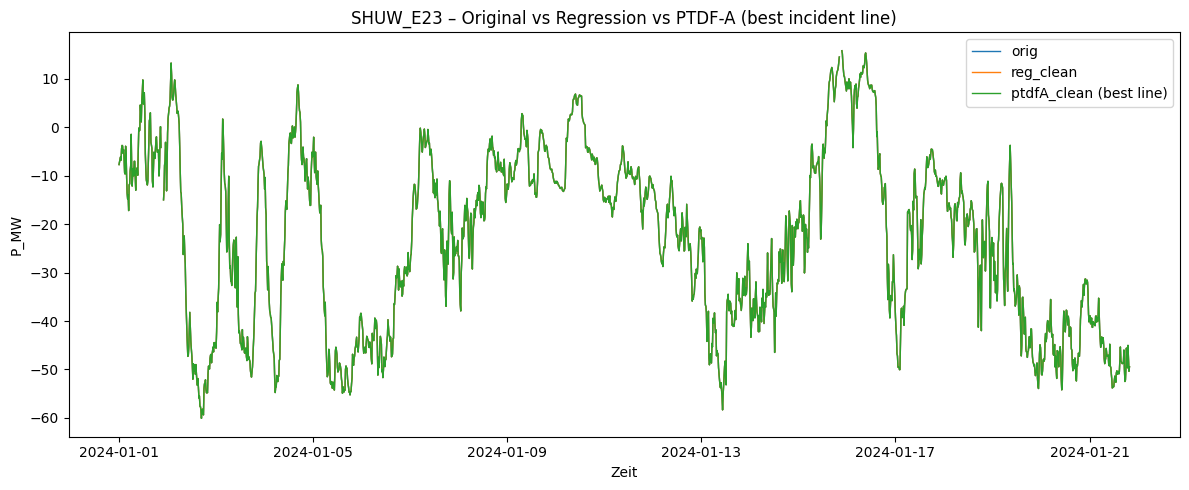

In [11]:
# %%
# ============================================================
# Variante A (besser): Feld -> inzidente Leitung mit max |PTDF(line, BESS)|
# Voraussetzungen: bess, orig_series, reg_results_df, reg_clean_df existieren
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.network.network_model import load_network_model
from src.network.ptdf import compute_ptdf

# ---- Settings ----
BESS_NODE = "BOLS_E42"
PLOT_NODE = "SHUW_E23"
PTDF_USE_PINV = True
OVERRIDE_SLACK_NODE = None

# ---- Load net + PTDF ----
net = load_network_model(slack_node=OVERRIDE_SLACK_NODE)
H = compute_ptdf(net, relevant_only=False, use_pinv=PTDF_USE_PINV)

print("PTDF H:", H.shape, "(lines x non-slack nodes) | slack:", net.slack_node)

if BESS_NODE == net.slack_node:
    raise ValueError(f"BESS_NODE={BESS_NODE} ist Slack. OVERRIDE_SLACK_NODE auf anderen Knoten setzen.")
if BESS_NODE not in H.columns:
    raise ValueError(f"BESS_NODE={BESS_NODE} nicht in H.columns.")

A = net.A  # lines x nodes

# ---- Mapping: field -> best incident line ----
best_line = {}
best_k = {}

for field in orig_series.keys():
    if field not in A.columns:
        continue

    inc = A.index[A[field] != 0].tolist()
    if not inc:
        continue

    # nur Leitungen, die in PTDF vorkommen
    inc = [l for l in inc if l in H.index]
    if not inc:
        continue

    # PTDF Werte dieser Leitungen bzgl. BESS
    vals = H.loc[inc, BESS_NODE].astype(float)

    # best = max |PTDF|
    l_star = vals.abs().idxmax()
    k_star = float(vals.loc[l_star])

    best_line[field] = l_star
    best_k[field] = k_star

best_line = pd.Series(best_line, name="line_id")
best_k = pd.Series(best_k, name="k_j").sort_values(key=np.abs, ascending=False)

print("Top 20 |k_j| nach improved mapping:")
display(best_k.head(20))

# ---- PTDF-A bereinigen ----
ptdfA_clean_series = {}
ptdfA_results = []

for node, y_full in orig_series.items():
    if node not in best_k.index:
        continue

    k_j = float(best_k.loc[node])

    bess_raw = bess.reindex(y_full.index)["BESS_P"]
    bess_filled = bess_raw.fillna(0.0)

    y_clean = y_full - k_j * bess_filled
    ptdfA_clean_series[node] = y_clean

    mask = ~bess_raw.isna()
    corr_after = bess_raw[mask].corr(y_clean[mask]) if mask.sum() >= 10 else np.nan
    mean_abs_removed = (k_j * bess.loc[mask, "BESS_P"]).abs().mean() if mask.sum() > 0 else np.nan

    ptdfA_results.append({
        "node": node,
        "line_id": best_line.get(node, None),
        "k_j": k_j,
        "corr_after_ptdfA": corr_after,
        "mean_abs_removed_MW_ptdfA": mean_abs_removed,
    })

ptdfA_clean_df = pd.DataFrame(ptdfA_clean_series)
ptdfA_results_df = pd.DataFrame(ptdfA_results)

print("PTDF-A (improved mapping) bereinigte Nodes:", ptdfA_clean_df.shape[1])
display(ptdfA_results_df.head())

# ---- Compare ----
compare_A = reg_results_df.merge(ptdfA_results_df, on="node", how="inner").copy()

compare_A["abs_corr_before"] = compare_A["corr_before"].abs()
compare_A["abs_corr_after_reg"] = compare_A["corr_after_reg"].abs()
compare_A["abs_corr_after_ptdfA"] = compare_A["corr_after_ptdfA"].abs()
compare_A["corr_improvement_reg"] = compare_A["abs_corr_before"] - compare_A["abs_corr_after_reg"]
compare_A["corr_improvement_ptdfA"] = compare_A["abs_corr_before"] - compare_A["abs_corr_after_ptdfA"]
compare_A = compare_A.sort_values(by="corr_before", key=np.abs, ascending=False)

cols = [
    "node","line_id","corr_before","corr_after_reg","corr_after_ptdfA",
    "beta","k_j","r2",
    "mean_abs_removed_MW_reg","mean_abs_removed_MW_ptdfA",
    "corr_improvement_reg","corr_improvement_ptdfA"
]
cols = [c for c in cols if c in compare_A.columns]

print("Vergleich – Regression vs. PTDF-A (improved mapping) Top 30:")
display(compare_A[cols].head(30))

# ---- Plot example ----
if (PLOT_NODE in orig_series and PLOT_NODE in reg_clean_df.columns and PLOT_NODE in ptdfA_clean_df.columns):
    idx = orig_series[PLOT_NODE].index[:2000]
    plt.figure(figsize=(12, 5))
    plt.plot(idx, orig_series[PLOT_NODE].loc[idx], label="orig", linewidth=1)
    plt.plot(idx, reg_clean_df[PLOT_NODE].loc[idx], label="reg_clean", linewidth=1)
    plt.plot(idx, ptdfA_clean_df[PLOT_NODE].loc[idx], label="ptdfA_clean (best line)", linewidth=1)
    plt.title(f"{PLOT_NODE} – Original vs Regression vs PTDF-A (best incident line)")
    plt.xlabel("Zeit"); plt.ylabel("P_MW")
    plt.legend(); plt.tight_layout(); plt.show()
else:
    print(f"{PLOT_NODE} nicht in allen DataFrames vorhanden.")


In [14]:
from src.data.data_loader import load_all_data

data = load_all_data()
print("keys:", data.keys())
print("weather_hist type/len:", type(data.get("weather_hist")), len(data.get("weather_hist", {})))
print("weather_forecast type/len:", type(data.get("weather_forecast")), len(data.get("weather_forecast", {})))

# optional: zeigen, was genau drin ist
print("weather_hist keys:", list((data.get("weather_hist") or {}).keys())[:10])
print("weather_forecast keys:", list((data.get("weather_forecast") or {}).keys())[:10])


/Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/src/data/data_loader.py:454: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  s = pd.concat([s_old, s_new])
/Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'historical-forecast-api.open-meteo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/martinkrawtzow/Documents/Masterthesis/thesis/Code/Github/masterthesis/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request

keys: dict_keys(['nodes', 'measurements', 'weather_hist', 'weather_forecast'])
weather_hist type/len: <class 'dict'> 16
weather_forecast type/len: <class 'dict'> 16
weather_hist keys: ['SHUW_E24', 'SHUW_E23', 'JUBO_E02', 'JUBO_E03', 'TARP_E03', 'TARP_E01', 'WEDING_E14', 'WEDING_E12', 'SIEV_E01', 'SIES_E02']
weather_forecast keys: ['SHUW_E24', 'SHUW_E23', 'JUBO_E02', 'JUBO_E03', 'TARP_E03', 'TARP_E01', 'WEDING_E14', 'WEDING_E12', 'SIEV_E01', 'SIES_E02']
